<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/K_Akshya/Final_Notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

**Data Import and Overview**

In [2]:
df=pd.read_csv('/content/all_season_details.csv')

In [3]:
df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [4]:
df.tail()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
242545,219020,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,lovely! Balaji's bowled a yorker outside off s...,NaN,NaN
242546,219030,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne steps down the track and throws his bat ...,NaN,<p>6 off 3 balls.</p>
242547,219050,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne reaches out for a full ball and squeezes...,NaN,<p>Three to win off two balls.</p>
242548,219040,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,what has he done! Balaji has bowled a wide out...,<p>Rajasthan need two runs a ball. Balaji from...,NaN
242549,219060,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Balaji bowls a full toss angling into the left...,NaN,<p>Rajasthan need one off the final ball.</p>


In [5]:
df.sample(10)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
2343,29060,2023.0,1359484,LSG v SRH,LSG,SRH,LSG,2,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"extra cover fielder dives forward, but can't c...",NaN,NaN
94074,211050,2017.0,1082596,SRH v GL,SRH,GL,SRH,2,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,another slower delivery which he slips way out...,NaN,NaN
60332,210020,2020.0,1216544,RCB v CSK,RCB,CSK,CSK,2,11,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"on the pads, on a length, worked around the co...",NaN,NaN
118510,23030,2016.0,981003,DC v SRH,DC,SRH,DC,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, top-of-off stuff. Worked to wide ...",NaN,NaN
212821,114010,2010.0,419154,RR v RCB,RR,RCB,RR,1,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"another bouncer, and again Raut is too late on...",<p>Vinay Kumar comes back</p>,NaN
236800,28040,2008.0,336015,RR v DC,RR,DC,RR,2,9,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<b>Free Hit</b>: Watson moves quickly across h...,NaN,NaN
81854,22040,2018.0,1136575,RR v KKR,RR,KKR,KKR,2,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"hint of width again, punches this straight to ...",NaN,NaN
13136,19010,2023.0,1359530,KKR v RR,KKR,RR,KKR,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Length on off, pulled to deep midwicket","<p>Third straight over from Ashwin, he remains...",NaN
202513,118020,2010.0,419111,RR v DC,RR,DC,RR,1,19,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
236274,23020,2008.0,336013,CSK v KXIP,CSK,KXIP,KXIP,2,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,once again he tries to drive through the off b...,NaN,NaN


In [6]:
df.shape

(242550, 45)

In [7]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [8]:
print(df.columns.nunique())
df.columns.unique()

45


Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [9]:
df.describe()

,comment_id,season,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,242550.000000,242067.000000,2.425500e+05,242550.000000,242550.000000,242550.000000,242550.000000,2.425500e+05,242550.000000,242550.000000,...,242550.000000,242550.000000,2.297090e+05,229709.000000,229709.000000,229709.000000,229709.000000,1.188000e+04,11880.000000,11880.000000
mean,86415.531767,2015.588048,8.701769e+05,1.483245,10.161678,3.483875,1.317901,2.503057e+05,18.047631,14.119819,...,16.551618,13.219233,3.151650e+05,2.198914,0.024483,16.235019,0.551868,2.635273e+05,18.815404,15.311869
std,79516.360959,4.639506,3.530671e+05,0.499720,5.658053,1.707451,1.612821,2.968806e+05,18.341545,11.905881,...,17.771899,11.892068,3.222056e+05,1.046243,0.155527,10.171336,0.773715,3.039915e+05,19.542348,12.695239
min,110.000000,2008.000000,3.359820e+05,1.000000,1.000000,1.000000,0.000000,4.292000e+03,0.000000,0.000000,...,0.000000,0.000000,4.508000e+03,0.100000,0.000000,0.000000,0.000000,4.292000e+03,0.000000,0.000000
25%,18040.000000,2012.000000,5.483150e+05,1.000000,5.000000,2.000000,0.000000,3.296600e+04,4.000000,5.000000,...,3.000000,4.000000,3.333500e+04,1.000000,0.000000,8.000000,0.000000,3.314100e+04,4.000000,5.000000
50%,29010.000000,2015.000000,8.298190e+05,1.000000,10.000000,3.000000,1.000000,5.291200e+04,12.000000,11.000000,...,11.000000,10.000000,2.655640e+05,2.000000,0.000000,14.000000,0.000000,2.118540e+05,12.000000,12.000000
75%,118060.000000,2020.000000,1.216506e+06,2.000000,15.000000,5.000000,1.000000,3.791430e+05,27.000000,20.000000,...,25.000000,20.000000,4.752810e+05,3.000000,0.000000,23.000000,1.000000,3.984390e+05,28.000000,22.000000
max,219080.000000,2023.000000,1.370353e+06,2.000000,20.000000,7.000000,7.000000,1.349361e+06,174.000000,73.000000,...,174.000000,73.000000,1.350792e+06,4.000000,2.000000,70.000000,5.000000,1.312645e+06,129.000000,69.000000


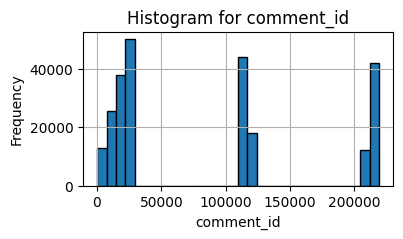

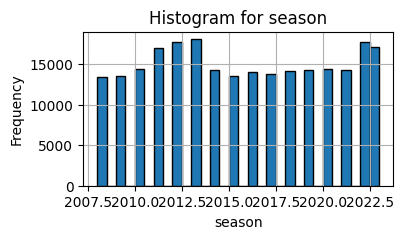

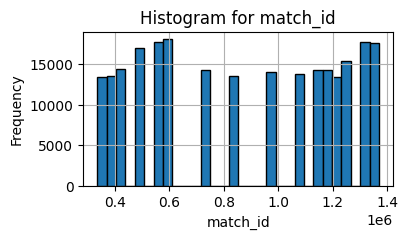

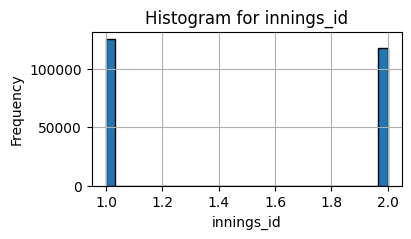

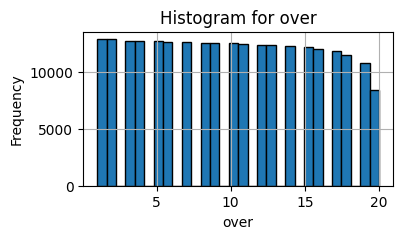

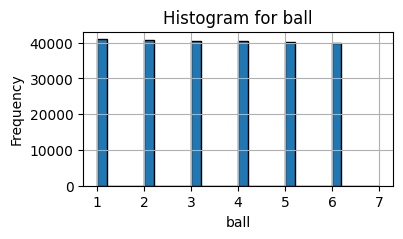

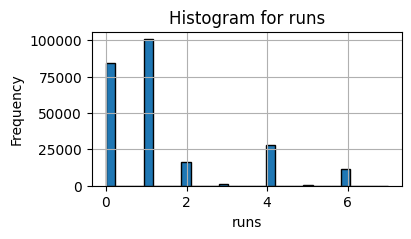

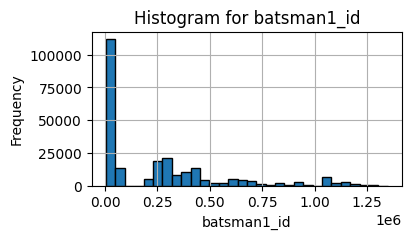

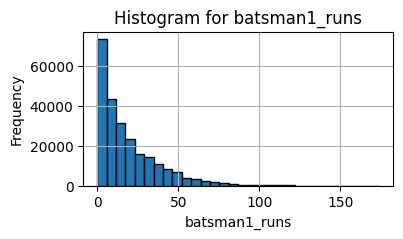

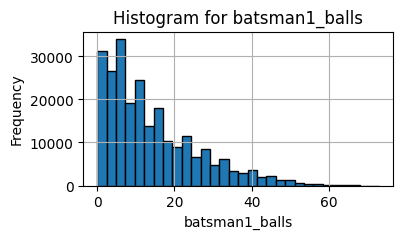

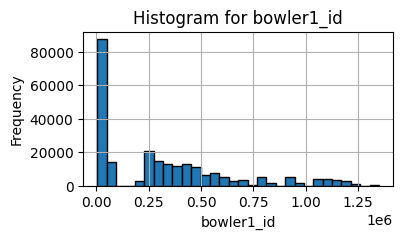

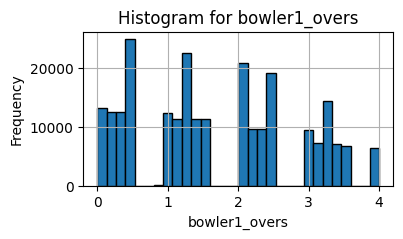

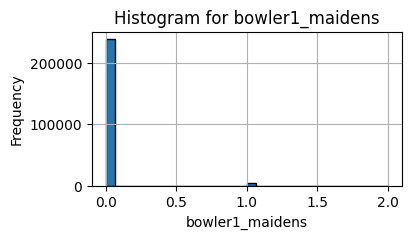

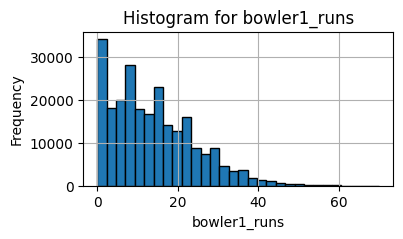

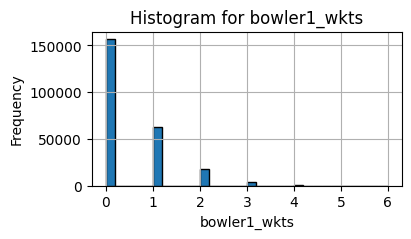

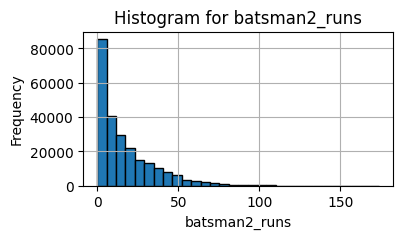

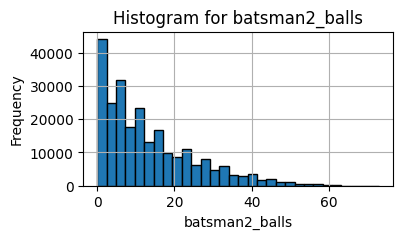

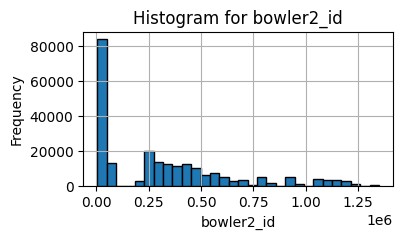

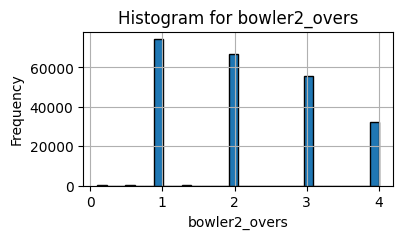

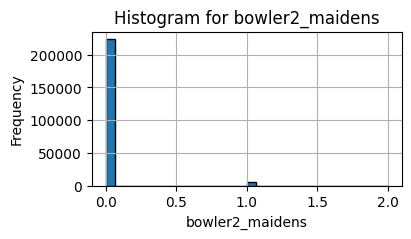

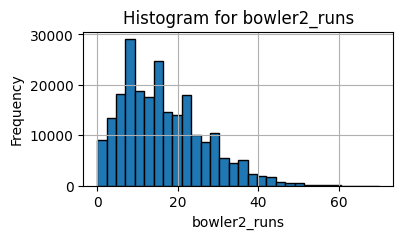

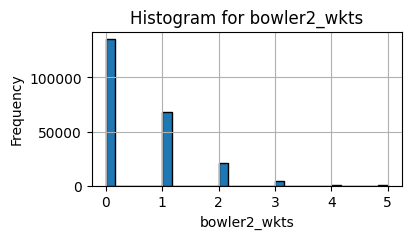

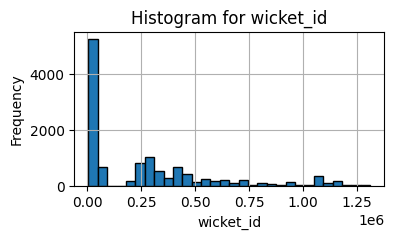

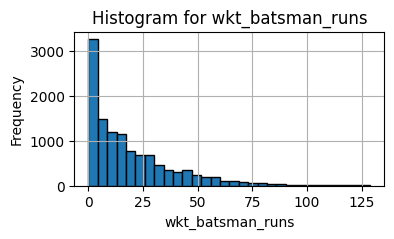

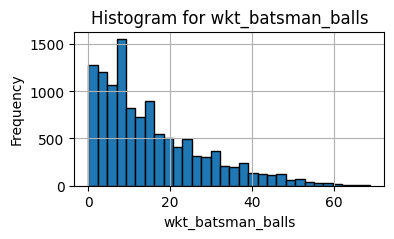

In [10]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(4, 2))
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [11]:
df.dtypes

,0
comment_id,int64
season,float64
match_id,int64
match_name,object
home_team,object
away_team,object
current_innings,object
innings_id,int64
over,int64
ball,int64


In [12]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
242545,False
242546,False
242547,False
242548,False


In [13]:
df[df.duplicated()].index

Index([13082], dtype='int64')

**Data Cleaning**

In [14]:
df.isnull().sum()

,0
comment_id,0
season,483
match_id,0
match_name,0
home_team,0
away_team,0
current_innings,0
innings_id,0
over,0
ball,0


In [15]:
df.isnull().sum()/df.shape[0]*100

,0
comment_id,0.000000
season,0.199134
match_id,0.000000
match_name,0.000000
home_team,0.000000
away_team,0.000000
current_innings,0.000000
innings_id,0.000000
over,0.000000
ball,0.000000


In [16]:
df.drop(['text','postText','preText','comment_id'],axis=1,inplace=True)
df

,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt
0,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,2,0,...,1.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
242546,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,3,1,...,1.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
242547,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,1,...,1.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
242548,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,2,...,1.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [17]:
df[df.duplicated()].index

Index([13082], dtype='int64')

In [18]:
dup=df[df.duplicated()]

In [19]:
df.drop(dup.index,inplace=True)

In [20]:
df.isnull().sum()

,0
season,483
match_id,0
match_name,0
home_team,0
away_team,0
current_innings,0
innings_id,0
over,0
ball,0
runs,0


In [21]:
df['isWide'] = df['isWide'].astype(bool)  # object to bool
df['isNoball'] = df['isNoball'].astype(bool) # object to bool
df['batsman1_runs'] = df['batsman1_runs'].astype(int)  # float to int
df['batsman1_balls'] = df['batsman1_balls'].astype(int)
df['bowler1_runs'] = df['bowler1_runs'].astype(int)
df['bowler1_wkts'] = df['bowler1_wkts'].astype(int)
df['bowler1_maidens'] = df['bowler1_maidens'].astype(int)


**EDA Basic Statistics**

In [22]:
mean_df=df.mean(numeric_only=True)
mean_df

,0
season,2015.588017
match_id,870174.882737
innings_id,1.483247
over,10.161716
ball,3.483886
runs,1.317899
isBoundary,0.161559
isWide,0.031338
isNoball,0.004127
batsman1_id,250305.529975


In [23]:
median_df=df.median(numeric_only=True)
median_df

,0
season,2015.0
match_id,829819.0
innings_id,1.0
over,10.0
ball,3.0
runs,1.0
isBoundary,0.0
isWide,0.0
isNoball,0.0
batsman1_id,52912.0


In [24]:
mode_df=df.mode(numeric_only=True)
mode_df

,season,match_id,innings_id,over,ball,runs,isBoundary,isWide,isNoball,batsman1_id,...,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls,isRetiredHurt
0,2013.0,335989,1.0,2.0,1.0,1.0,False,False,False,253802.0,...,0.0,26421.0,1.0,0.0,8.0,0.0,34102.0,0.0,1.0,False
1,NaN,336009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,336023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,336036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,392190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NaN,1359536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,1359537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,1359540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,1359541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Measures the spread of data from the mean
std_values = df.std(numeric_only=True)
std_values

,0
season,4.639491
match_id,353066.379847
innings_id,0.499720
over,5.658034
ball,1.707447
runs,1.612824
isBoundary,0.368047
isWide,0.174230
isNoball,0.064109
batsman1_id,296881.184241


In [26]:
# understanding the spread of the data
variance_values = df.var(numeric_only=True)
variance_values

,0
season,2.152488e+01
match_id,1.246559e+11
innings_id,2.497204e-01
over,3.201335e+01
ball,2.915375e+00
runs,2.601201e+00
isBoundary,1.354583e-01
isWide,3.035605e-02
isNoball,4.109986e-03
batsman1_id,8.813844e+10


In [27]:
min_values = df.min(numeric_only=True)
min_values

,0
season,2008.0
match_id,335982
innings_id,1
over,1
ball,1
runs,0
isBoundary,False
isWide,False
isNoball,False
batsman1_id,4292


In [28]:
df.season.min()

2008.0

In [29]:
max_values = df.max(numeric_only=True)
max_values

,0
season,2023.0
match_id,1370353
innings_id,2
over,20
ball,7
runs,7
isBoundary,True
isWide,True
isNoball,True
batsman1_id,1349361


In [30]:
df.dtypes

,0
season,float64
match_id,int64
match_name,object
home_team,object
away_team,object
current_innings,object
innings_id,int64
over,int64
ball,int64
runs,int64


In [31]:
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)
quantiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
quantiles

,season,match_id,innings_id,over,ball,runs,isBoundary,isWide,isNoball,batsman1_id,...,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls,isRetiredHurt
0.25,2012.0,548315.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,32966.0,...,4.0,33335.0,1.0,0.0,8.0,0.0,33141.0,4.0,5.0,0.0
0.50,2015.0,829819.0,1.0,10.0,3.0,1.0,0.0,0.0,0.0,52912.0,...,10.0,265564.0,2.0,0.0,14.0,0.0,211854.0,12.0,12.0,0.0
0.75,2020.0,1216506.0,2.0,15.0,5.0,1.0,0.0,0.0,0.0,379143.0,...,20.0,475281.0,3.0,0.0,23.0,1.0,398439.0,28.0,22.0,0.0


In [32]:
skewness = df.skew(numeric_only=True)                         # to understand the asymmetric distribution of data
skewness

,0
season,0.036872
match_id,-0.085453
innings_id,0.067051
over,0.042967
ball,0.011533
runs,1.550749
isBoundary,1.839135
isWide,5.379856
isNoball,15.469770
batsman1_id,1.498729


In [33]:
correlation = df.corr(numeric_only=True)                # relationship between different variables
correlation

,season,match_id,innings_id,over,ball,runs,isBoundary,isWide,isNoball,batsman1_id,...,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls,isRetiredHurt
season,1.000000,0.987924,0.002115,0.010483,0.000883,0.025870,0.020097,0.006175,-0.001895,0.604744,...,0.015732,0.661912,0.016936,-0.013060,0.075183,0.013879,0.605016,0.047080,0.009792,0.002803
match_id,0.987924,1.000000,0.001337,0.009632,0.000815,0.027530,0.021333,0.005833,-0.002540,0.588707,...,0.016090,0.651950,0.014834,-0.014942,0.077471,0.011959,0.590135,0.050047,0.009614,0.003230
innings_id,0.002115,0.001337,1.000000,-0.043354,-0.003990,-0.006319,-0.001894,0.003118,-0.004856,0.008641,...,-0.021501,0.004746,-0.024619,-0.005195,-0.022852,0.017003,0.012447,-0.050462,-0.054747,-0.000212
over,0.010483,0.009632,-0.043354,1.000000,-0.012488,0.083484,0.012057,0.005198,0.018460,0.033369,...,0.335487,0.012800,0.726217,-0.019447,0.628825,0.307325,0.051130,0.255664,0.242235,0.002285
ball,0.000883,0.000815,-0.003990,-0.012488,1.000000,0.000417,-0.001552,-0.006112,-0.002311,0.001762,...,0.026773,-0.000025,-0.012084,-0.001330,-0.011257,-0.007477,0.005649,-0.005782,-0.021928,0.003396
runs,0.025870,0.027530,-0.006319,0.083484,0.000417,1.000000,0.893410,-0.012623,0.043255,0.012696,...,0.040833,0.024175,0.058579,-0.006313,0.078915,-0.016800,-0.009422,0.019703,0.007936,0.000793
isBoundary,0.020097,0.021333,-0.001894,0.012057,-0.001552,0.893410,1.000000,-0.078955,0.005990,0.008407,...,0.007093,0.020315,0.018315,0.000263,0.038189,-0.022747,0.005159,0.003674,0.002531,0.000339
isWide,0.006175,0.005833,0.003118,0.005198,-0.006112,-0.012623,-0.078955,1.000000,-0.011579,0.007194,...,-0.010480,0.005960,0.012232,0.004083,0.016568,0.010868,-0.008845,-0.006128,-0.006534,-0.001506
isNoball,-0.001895,-0.002540,-0.004856,0.018460,-0.002311,0.043255,0.005990,-0.011579,1.000000,0.000676,...,0.001111,0.002360,0.016423,0.002302,0.016571,0.005592,0.031384,0.006887,0.003196,-0.000539
batsman1_id,0.604744,0.588707,0.008641,0.033369,0.001762,0.012696,0.008407,0.007194,0.000676,1.000000,...,-0.000561,0.419526,0.029014,-0.015949,0.058708,0.043035,1.000000,-0.014817,-0.043542,-0.000378


<Axes: >

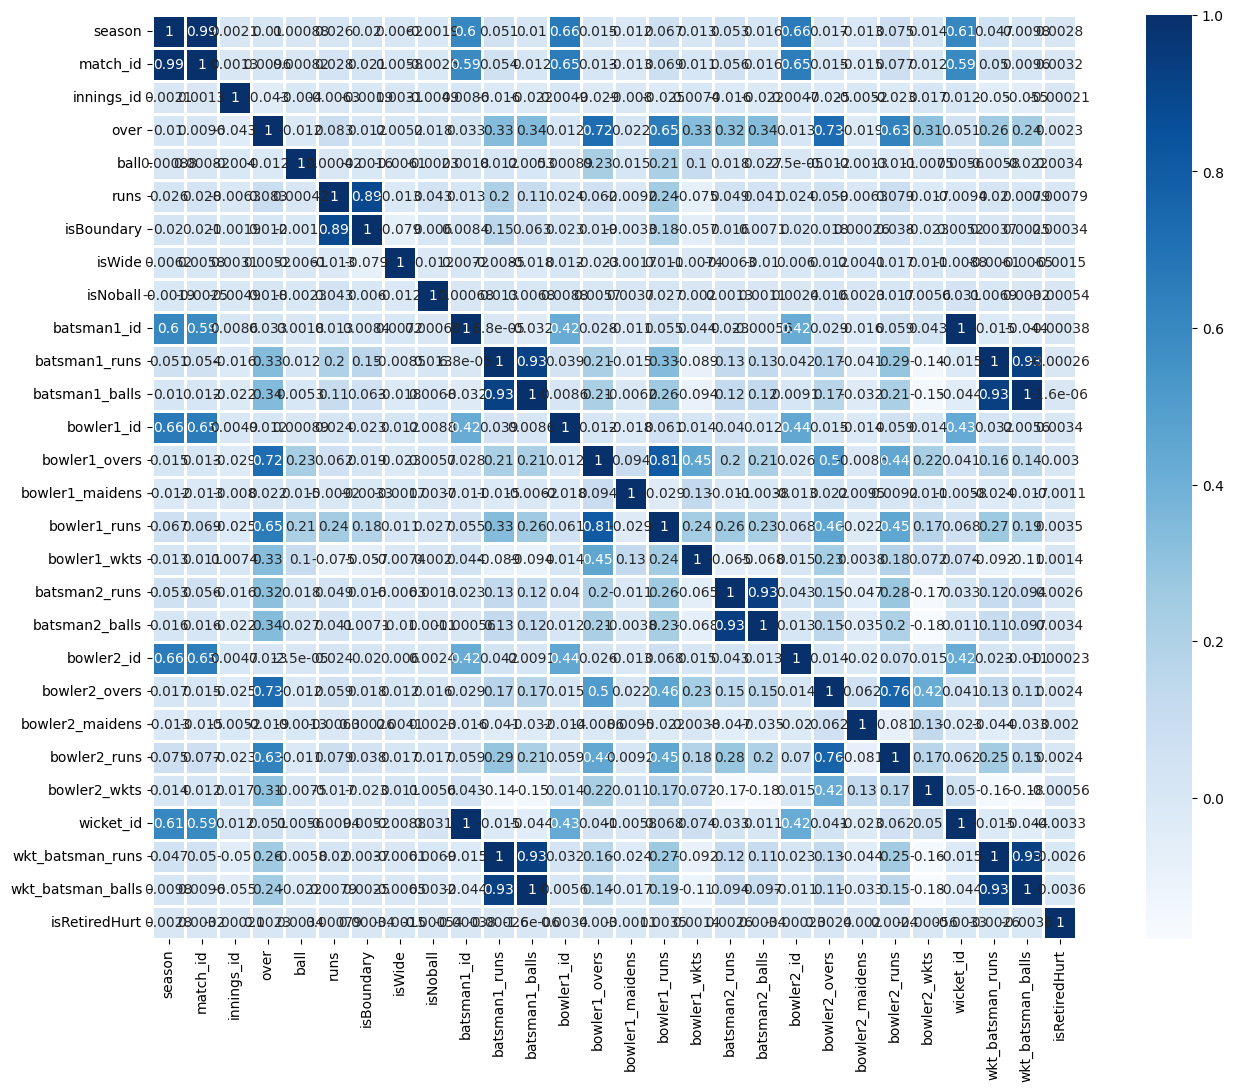

In [34]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Blues', square=True, linewidths=1.0)

**EDA_Visualizations**

In [35]:
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt'],
      dtype='object')

In [36]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Number of Matches Played in Each IPL Season**

---



In [37]:
match_per_season=df.groupby('season')['match_id'].nunique().sort_values(ascending=False).reset_index()
match_per_season

,season,match_id
0,2013.0,76
1,2012.0,74
2,2022.0,74
3,2011.0,73
4,2023.0,71
5,2010.0,60
6,2014.0,60
7,2016.0,60
8,2018.0,60
9,2019.0,60


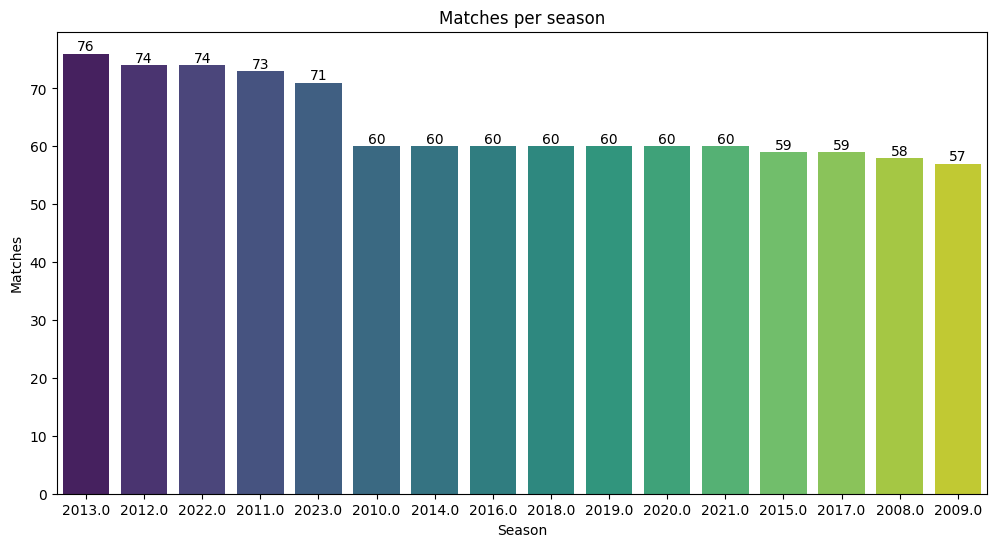

In [38]:
plt.figure(figsize=(12, 6))
bargraph=sns.barplot(x='season', y='match_id', data=match_per_season, palette='viridis',order=match_per_season['season'],width=0.8)
for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center',
        va='bottom' ,
        fontsize= 10
    )

plt.title('Matches per season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

**Report**

*  The more number of matches were playes in the year of 2013
*  The Least number of matches were played inn 2009



**Total Runs Scored in Each IPL Season**

---



In [39]:
runs_per_season=df.groupby('season')['runs'].sum().sort_values(ascending=False).reset_index()
runs_per_season

,season,runs
0,2023.0,24533
1,2022.0,24184
2,2013.0,22463
3,2012.0,22357
4,2011.0,21087
5,2018.0,19781
6,2019.0,19343
7,2020.0,19244
8,2014.0,18827
9,2016.0,18798


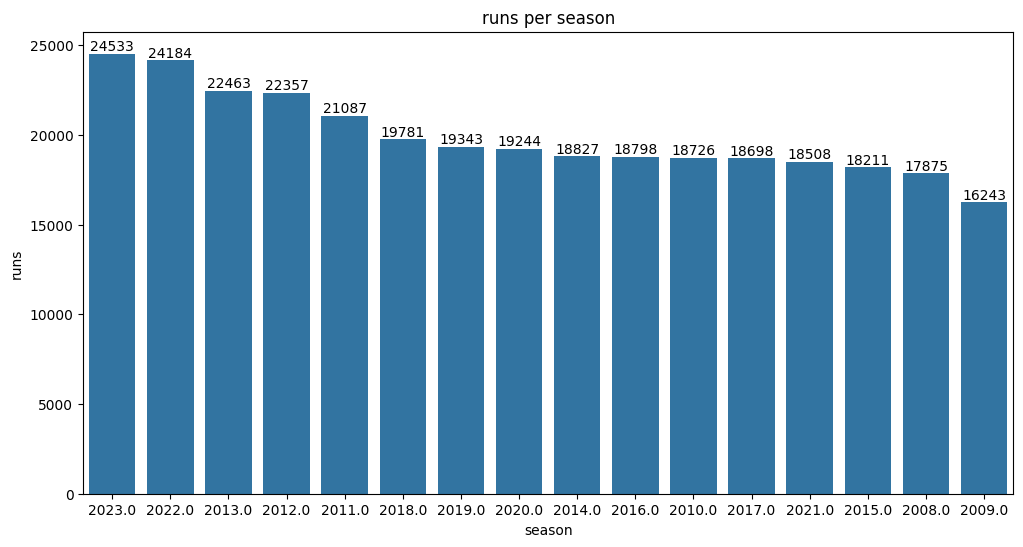

In [40]:
plt.figure(figsize=(12,6))
run=sns.barplot(x='season',y='runs',data=runs_per_season,order=runs_per_season['season'],width=0.8)
for bar in run.patches:
    run.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("runs per season")
plt.xlabel('season')
plt.ylabel('runs')
plt.show()



**Report**
*   The more number of runs were scored in the year of 2023
*   The least number of runs were scored in the year of **2009**



**Total Wickets Taken in Each IPL Season**

---



In [41]:
wickets_per_season=df.groupby('season')['wicket_id'].count().sort_values(ascending=False).reset_index()
wickets_per_season

,season,wicket_id
0,2013.0,903
1,2022.0,887
2,2023.0,869
3,2012.0,850
4,2011.0,804
5,2018.0,715
6,2010.0,708
7,2021.0,708
8,2017.0,705
9,2009.0,687


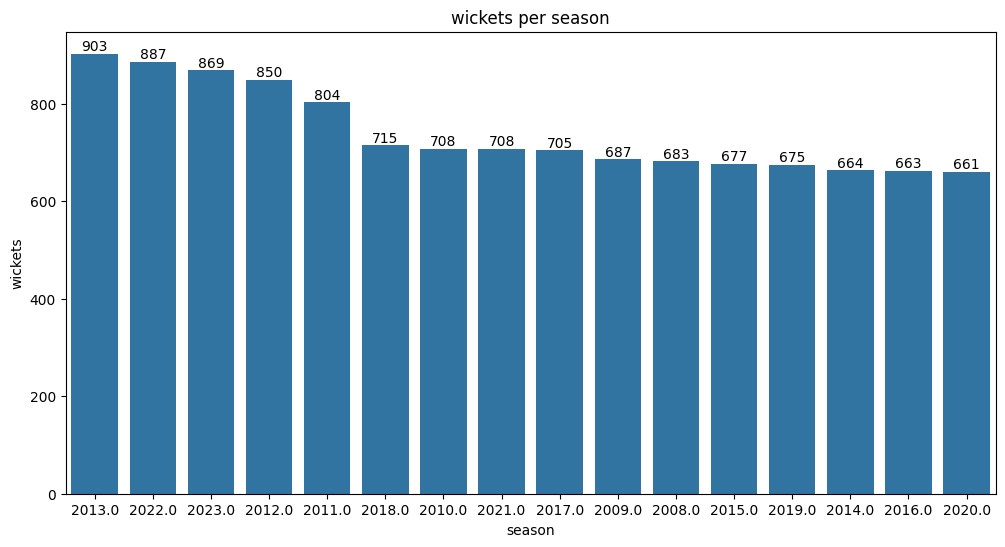

In [42]:
plt.figure(figsize=(12,6))
wickets=sns.barplot(x='season',y='wicket_id',data=wickets_per_season,order=wickets_per_season['season'],width=0.8)
for bar in wickets.patches:
    wickets.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("wickets per season")
plt.xlabel('season')
plt.ylabel('wickets')
plt.show()

**Report**

*   The more number of wickets are taken in the year of 2013
*   The least number of wickets were taken in the yaer of 2020 with a less compared to 2016



**Total Boundaries Hit in Each IPL Season**

---



In [43]:
boundaries_per_season=df.groupby('season')['isBoundary'].sum().sort_values(ascending=False).reset_index()
boundaries_per_season

,season,isBoundary
0,2023.0,3152
1,2022.0,3053
2,2013.0,2714
3,2012.0,2628
4,2011.0,2547
5,2018.0,2505
6,2019.0,2429
7,2008.0,2320
8,2020.0,2308
9,2017.0,2305


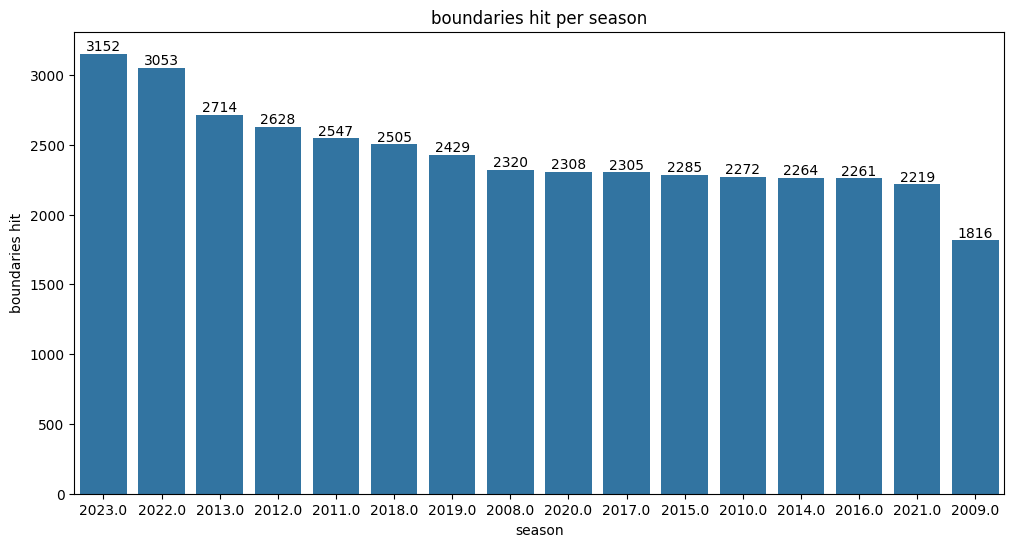

In [44]:
plt.figure(figsize=(12,6))
boundaries=sns.barplot(x='season',y='isBoundary',data=boundaries_per_season,order=boundaries_per_season['season'],width=0.8)
for bar in boundaries.patches:
    boundaries.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("boundaries hit per season")
plt.xlabel('season')
plt.ylabel('boundaries hit')
plt.show()

**Report**
*  2023 recorded the highest number of boundaries, followed by 2022 and 2013.
* 2009 had the least number of boundaries,beacause of less number of matches



**Total No-Balls Bowled in Each IPL Season**

---



In [45]:
noballs_per_season=df.groupby('season')['isNoball'].sum().sort_values(ascending=False).reset_index()
noballs_per_season

,season,isNoball
0,2023.0,95
1,2011.0,83
2,2008.0,82
3,2021.0,76
4,2009.0,73
5,2022.0,71
6,2012.0,61
7,2010.0,60
8,2013.0,59
9,2019.0,59


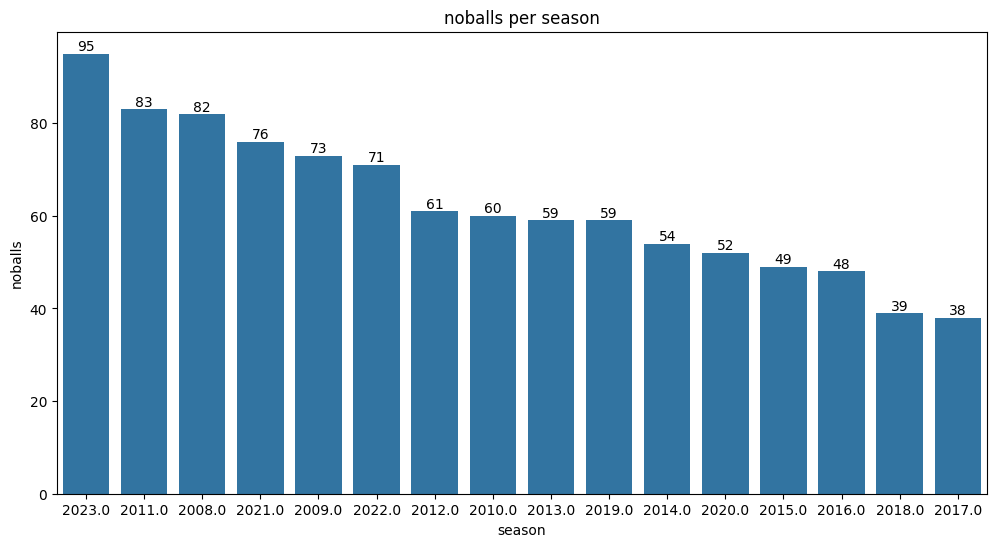

In [46]:
plt.figure(figsize=(12,6))
noballs=sns.barplot(x='season',y='isNoball',data=noballs_per_season,order=noballs_per_season['season'],width=0.8)
for bar in noballs.patches:
    noballs.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("noballs per season")
plt.xlabel('season')
plt.ylabel('noballs')
plt.show()

**Report**
* 2023 had the highest number of no-balls bowled, with a total of 97, followed by 2011 with 83 and 2008 with 82.
*  In 2017 there is a least number of no balls bowled of 38 it shows the better accuracy of the bowlwe



**Total Wides Bowled in Each IPL Season**

---



In [47]:
wides_per_season=df.groupby('season')['isWide'].sum().sort_values(ascending=False).reset_index()
wides_per_season

,season,isWide
0,2022.0,696
1,2023.0,597
2,2011.0,501
3,2012.0,497
4,2010.0,495
5,2013.0,476
6,2021.0,460
7,2008.0,457
8,2015.0,447
9,2020.0,446


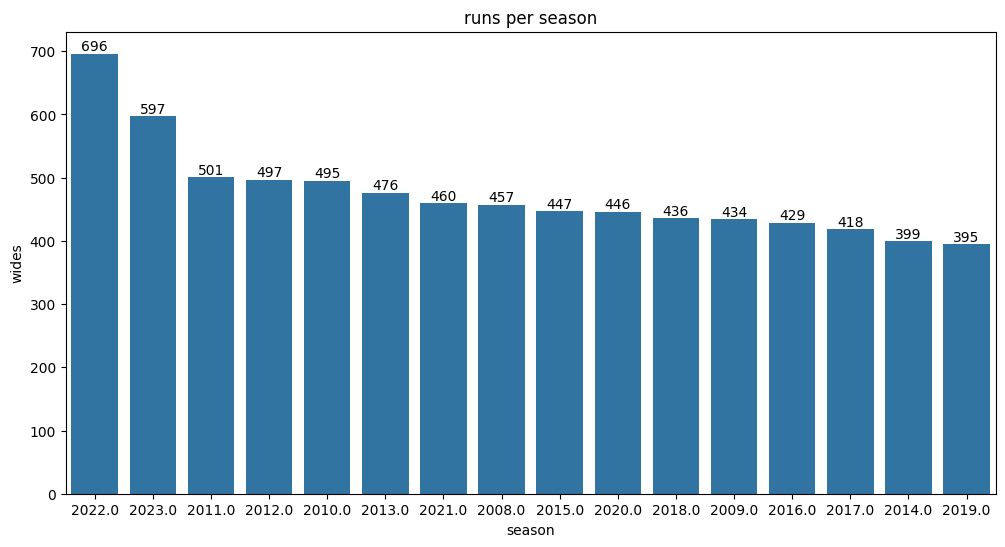

In [48]:
plt.figure(figsize=(12,6))
wides=sns.barplot(x='season',y='isWide',data=wides_per_season,order=wides_per_season['season'],width=0.8)
for bar in wides.patches:
    wides.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("runs per season")
plt.xlabel('season')
plt.ylabel('wides')
plt.show()


**Report**
* 2022 had the highest number of wide balls bowled, with a total of 696, followed by 2023 with 615 and 2011 with 501.
* In 2019 there is a least number of no balls bowled of 395 it shows the better accuracy of the bowler



**Total Unique Matches Played Across All IPL Seasons**

---



In [49]:
umatches_per_season=df.groupby('season')['match_id'].nunique().sum()
umatches_per_season

1021

**Number of Unique Teams per Season**

---



In [50]:
combined_teams = pd.concat([df[['season', 'home_team']].rename(columns={'home_team': 'team'}),
                            df[['season', 'away_team']].rename(columns={'away_team': 'team'})])
unique_teams_per_season = combined_teams.groupby('season')['team'].nunique().reset_index()
unique_teams_per_season

,season,team
0,2008.0,8
1,2009.0,8
2,2010.0,8
3,2011.0,10
4,2012.0,9
5,2013.0,9
6,2014.0,8
7,2015.0,8
8,2016.0,8
9,2017.0,8


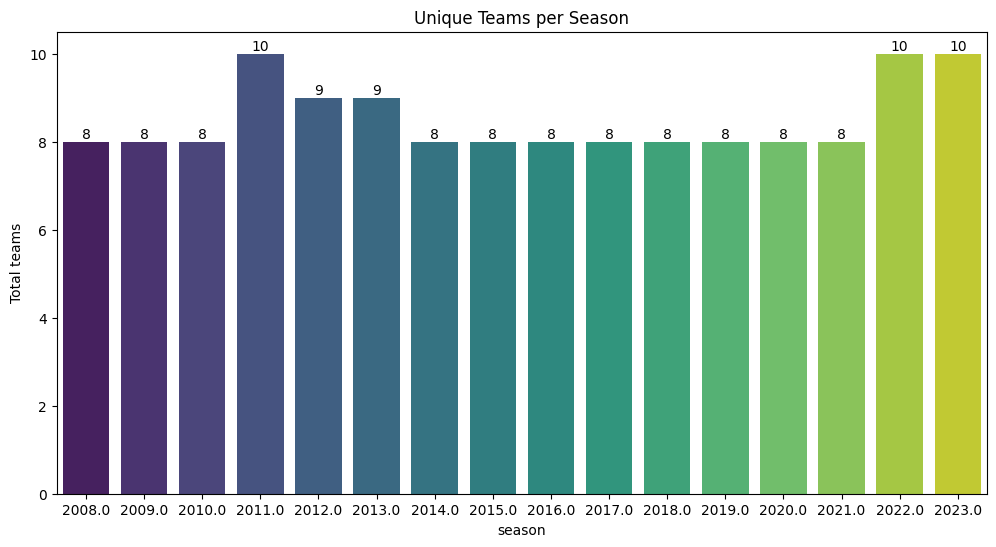

In [51]:
plt.figure(figsize=(12,6))
team=sns.barplot(x='season',y='team',data=unique_teams_per_season,order=unique_teams_per_season['season'],width=0.8,palette='viridis')
for bar in team.patches:
    team.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("Unique Teams per Season")
plt.xlabel('season')
plt.ylabel('Total teams')
plt.show()

**Home Teams by Total Runs Scored**

---



In [52]:
hometeam_per_season=df.groupby('home_team')['runs'].sum().sort_values(ascending=False).reset_index()
hometeam_per_season

,home_team,runs
0,CSK,38452
1,RCB,38285
2,DC,38057
3,MI,37828
4,SRH,37371
5,KKR,34903
6,RR,30118
7,KXIP,29635
8,PBKS,6577
9,PWI,6436


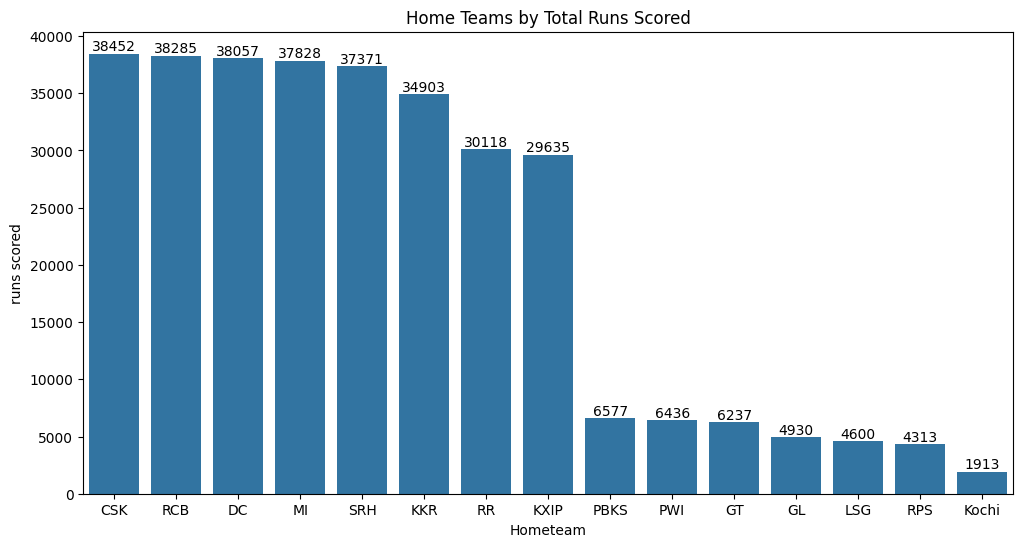

In [53]:
plt.figure(figsize=(12,6))
hometeam=sns.barplot(x='home_team',y='runs',data=hometeam_per_season,order=hometeam_per_season['home_team'],width=0.8)
for bar in hometeam.patches:
    hometeam.annotate(
      int(bar.get_height()),
      (bar.get_x()+bar.get_width()/2,bar.get_height()),
      ha='center',
      va='bottom',
      fontsize=10,
  )

plt.title("Home Teams by Total Runs Scored")
plt.xlabel('Hometeam')
plt.ylabel('runs scored')
plt.show()


**Report**
*   The more number of runs were scored by the CSK in thier Home town matches
*   The least number of runs were scored by the Kochi in thier Home town matches



**Top Away Teams by Total Runs Scored**

---



In [54]:
top_away_teams = df.groupby('away_team')['runs'].sum().sort_values(ascending=False).reset_index()
top_away_teams

,away_team,runs
0,MI,39762
1,KKR,38011
2,SRH,37428
3,RCB,36958
4,DC,35545
5,RR,33992
6,CSK,31843
7,KXIP,30517
8,PBKS,7279
9,PWI,6739


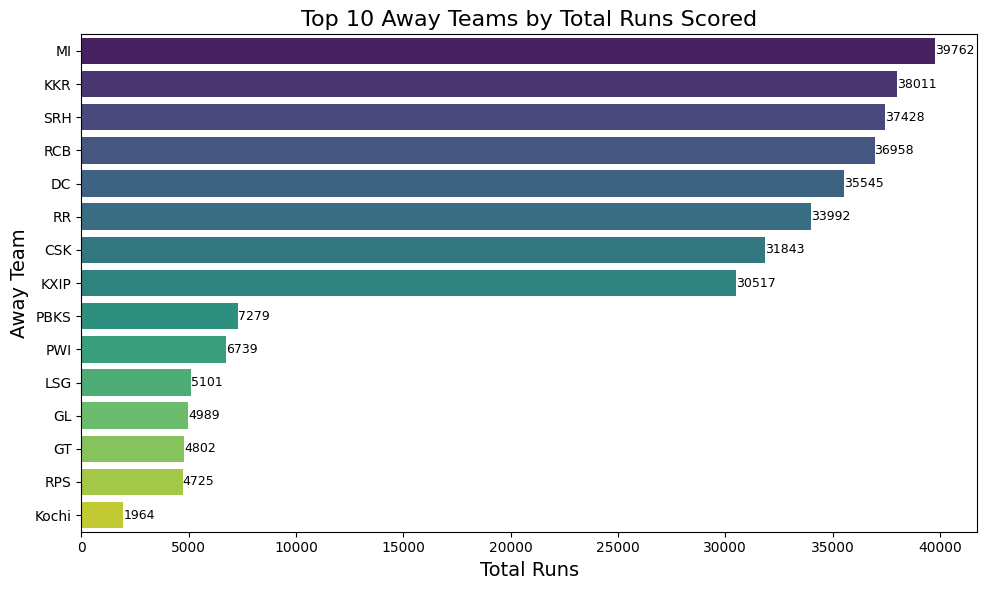

In [55]:
plt.figure(figsize=(10, 6))
bargraph = sns.barplot(x='runs', y='away_team', data=top_away_teams, palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9
    )

plt.title('Top 10 Away Teams by Total Runs Scored', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Away Team', fontsize=14)
plt.tight_layout()
plt.show()

**Report**

*   The Mumbai Indians scored more runs even the played as away teams
*   The Kochi scored less runs played as away team



**Total Runs Scored by Each Team (Combined)**

---



In [56]:
home_team_runs = df.groupby('home_team')['runs'].sum()
away_team_runs = df.groupby('away_team')['runs'].sum()

total_team_runs = home_team_runs.add(away_team_runs)
total_team_runs = total_team_runs.sort_values(ascending=False).reset_index()
total_team_runs.columns = ['Team', 'Total Runs']
total_team_runs

,Team,Total Runs
0,MI,77590
1,RCB,75243
2,SRH,74799
3,DC,73602
4,KKR,72914
5,CSK,70295
6,RR,64110
7,KXIP,60152
8,PBKS,13856
9,PWI,13175


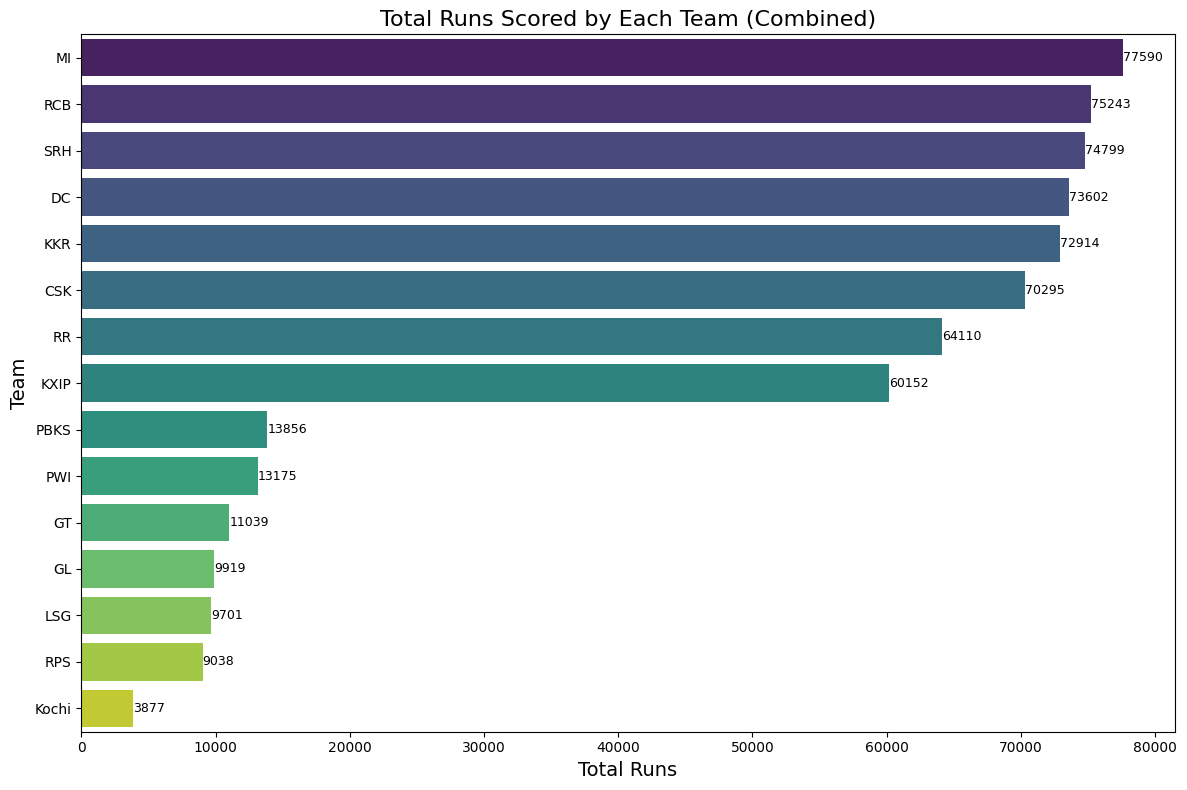

In [57]:
plt.figure(figsize=(12, 8))
bargraph = sns.barplot(x='Total Runs', y='Team', data=total_team_runs, palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9
    )

plt.title('Total Runs Scored by Each Team (Combined)', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

**Report**


*   The MI team scored more runs followed by RCB
*   The kochi team scored less runs in both home team ad away team



**Total Wickets Taken by Each Home Team**

---



In [58]:
home_team_wickets = df.groupby('home_team')['wicket_id'].count().sort_values(ascending=False).reset_index()
home_team_wickets.columns=['hometeam','Total wickets']
home_team_wickets

,hometeam,Total wickets
0,SRH,1470
1,MI,1425
2,CSK,1417
3,RCB,1401
4,DC,1395
5,KKR,1334
6,RR,1084
7,KXIP,1036
8,PWI,270
9,PBKS,227


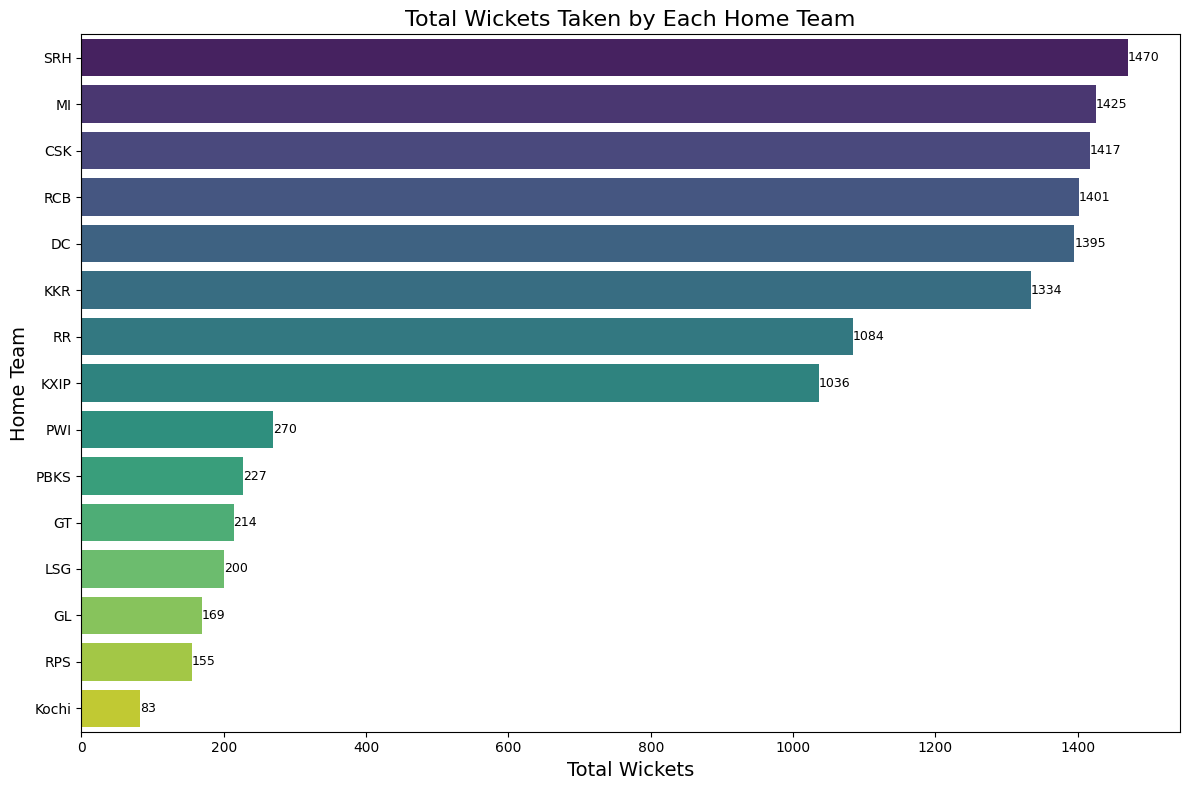

In [59]:
plt.figure(figsize=(12, 8))
bargraph = sns.barplot(x='Total wickets', y='hometeam', data=home_team_wickets, palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9
    )

plt.title('Total Wickets Taken by Each Home Team', fontsize=16)
plt.xlabel('Total Wickets', fontsize=14)
plt.ylabel('Home Team', fontsize=14)
plt.tight_layout()
plt.show()

**Report**


*   The SRH team take more wickets when they are played in thier home team followed by MI
*   kochi take less wickets when they are played in thier home team



 **Total Wickets Taken by Each Away Team**

---



In [60]:
away_team_wickets = df.groupby('away_team')['wicket_id'].count().sort_values(ascending=False).reset_index()
away_team_wickets.columns=['awayteam','Total wickets']
away_team_wickets

,awayteam,Total wickets
0,MI,1510
1,KKR,1395
2,DC,1393
3,SRH,1375
4,RCB,1351
5,RR,1285
6,KXIP,1161
7,CSK,1108
8,PBKS,272
9,PWI,261


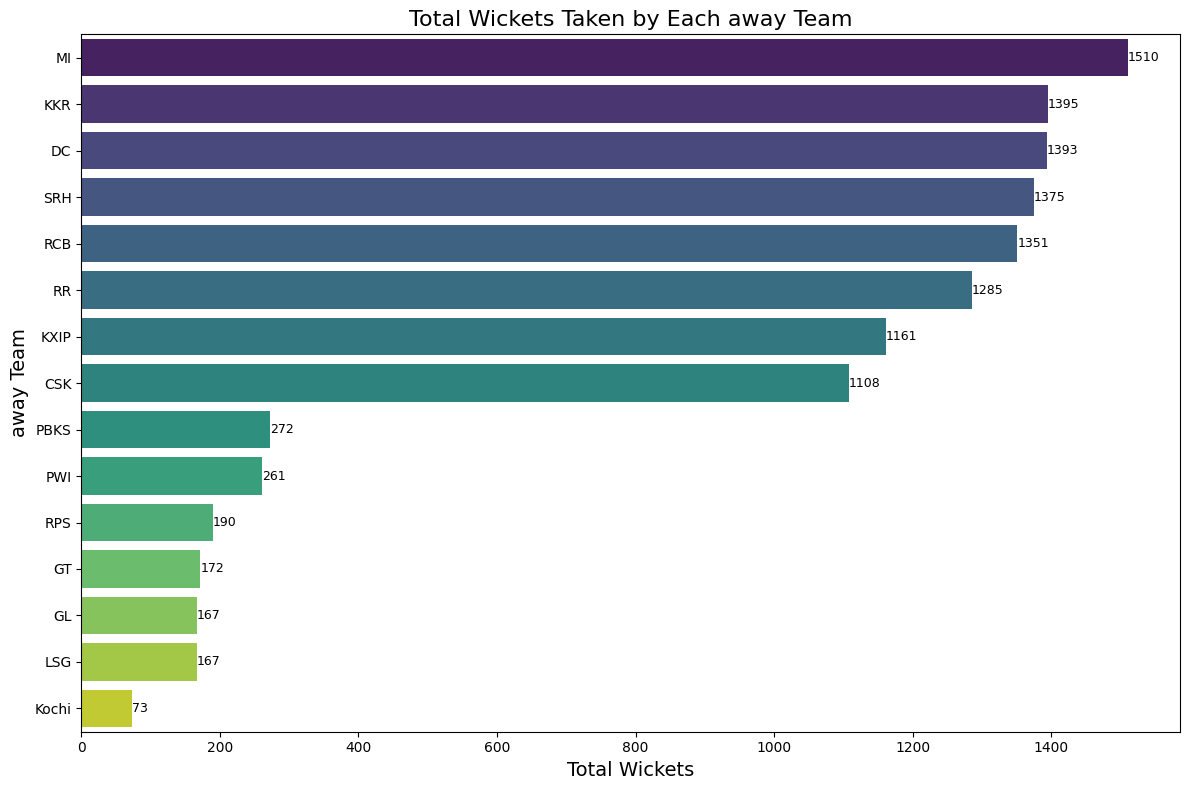

In [61]:
plt.figure(figsize=(12, 8))
bargraph = sns.barplot(x='Total wickets', y='awayteam', data=away_team_wickets, palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9
    )

plt.title('Total Wickets Taken by Each away Team', fontsize=16)
plt.xlabel('Total Wickets', fontsize=14)
plt.ylabel('away Team', fontsize=14)
plt.tight_layout()
plt.show()

**Report**


*   MI teams has taken the more wickets in their away team
*   Kochi team taken less wickets in thier away team




**Total Wickets Taken by Each Team (Home and Away)**

---



In [62]:
home_team_wickets = df.groupby('home_team')['wicket_id'].count()
away_team_wickets = df.groupby('away_team')['wicket_id'].count()

total_team_wickets = home_team_wickets.add(away_team_wickets)
total_team_wickets = total_team_wickets.sort_values(ascending=False).reset_index()
total_team_wickets.columns = ['Team', 'Total wickets']
total_team_wickets

,Team,Total wickets
0,MI,2935
1,SRH,2845
2,DC,2788
3,RCB,2752
4,KKR,2729
5,CSK,2525
6,RR,2369
7,KXIP,2197
8,PWI,531
9,PBKS,499


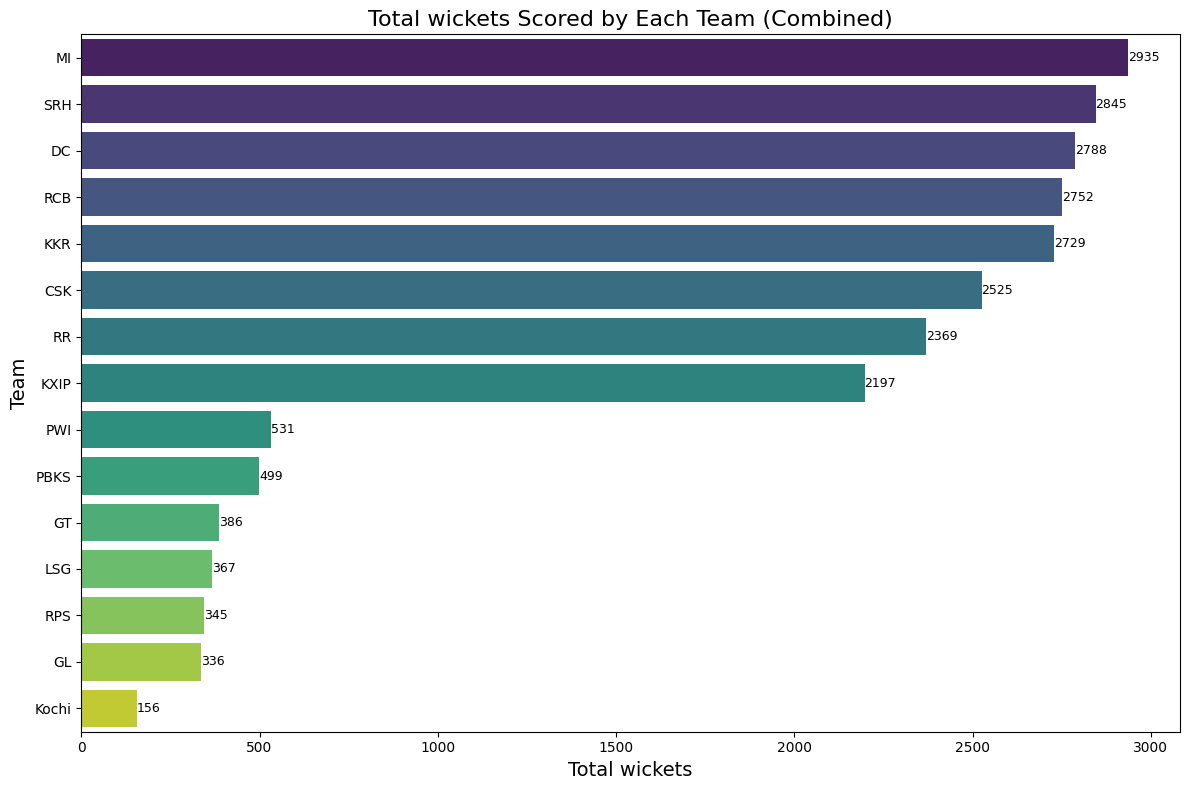

In [63]:
plt.figure(figsize=(12, 8))
bargraph = sns.barplot(x='Total wickets', y='Team', data=total_team_wickets, palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left',
        va='center',
        fontsize=9
    )

plt.title('Total wickets Scored by Each Team (Combined)', fontsize=16)
plt.xlabel('Total wickets', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.tight_layout()
plt.show()

**Top 10 Batsman by Runs Task**

---




In [64]:
top_batsman = df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False).head(10).reset_index()
top_batsman.columns = ['batsman', 'runs']
top_batsman

,batsman,runs
0,Virat Kohli,7513
1,Shikhar Dhawan,6948
2,David Warner,6722
3,Rohit Sharma,6414
4,Suresh Raina,5762
5,AB de Villiers,5312
6,Chris Gayle,5296
7,MS Dhoni,5245
8,Robin Uthappa,5237
9,Dinesh Karthik,4692


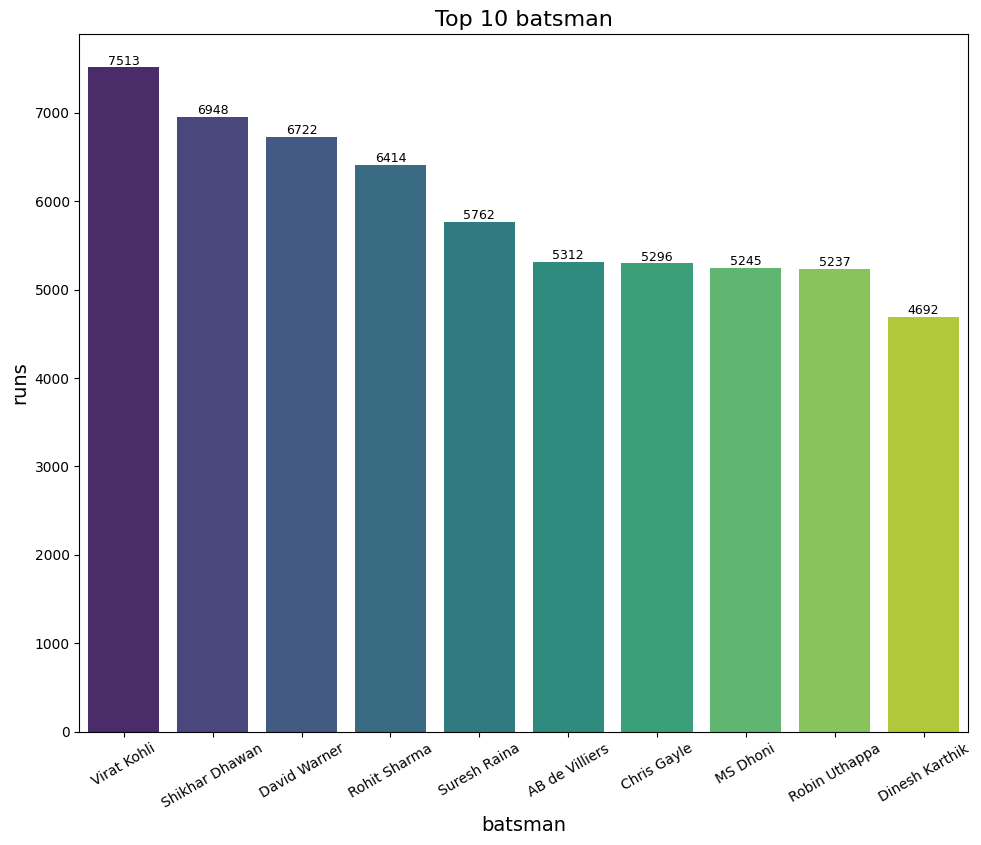

In [65]:
plt.figure(figsize=(10, 8))
bargraph = sns.barplot(x='batsman', y='runs', data=top_batsman, palette='viridis',order=top_batsman['batsman'],width=0.8)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width()/2,bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Top 10 batsman', fontsize=16)
plt.xlabel('batsman', fontsize=14)
plt.ylabel('runs', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

**Report**


*  The top batsman is virat kohli with respect to the runs he had scored


*   The less runs scored is Dinesh Karthik






**Distribution of Wides Bowled by Each Home Team**


In [66]:
home_team_wides = df.groupby('home_team')['isWide'].sum().sort_values(ascending=False).head(5)
home_team_wides.columns=['hometeam','Total wides']
home_team_wides

,isWide
home_team,
RCB,979
MI,967
CSK,915
DC,902
SRH,811


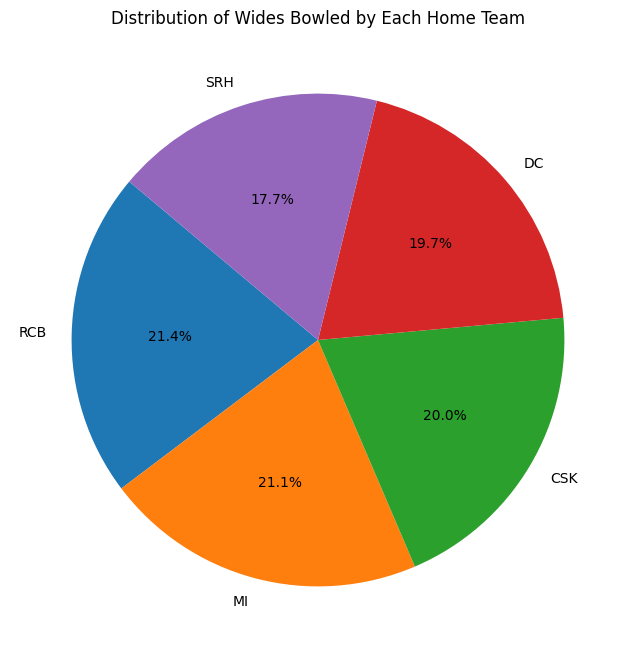

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(home_team_wides.values, labels=home_team_wides.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wides Bowled by Each Home Team')
plt.show()

**Report**


*   RCB take more wides comapred to other teams
*   The least wides are taken by the SRH



**Distribution of Wides Bowled by Each Away Team**

---



In [68]:
away_team_wides = df.groupby('away_team')['isWide'].sum().sort_values(ascending=False).head(5)
away_team_wides.columns=['awayteam','Total wides']
away_team_wides

,isWide
away_team,
MI,1016
KKR,917
RR,851
SRH,846
RCB,837


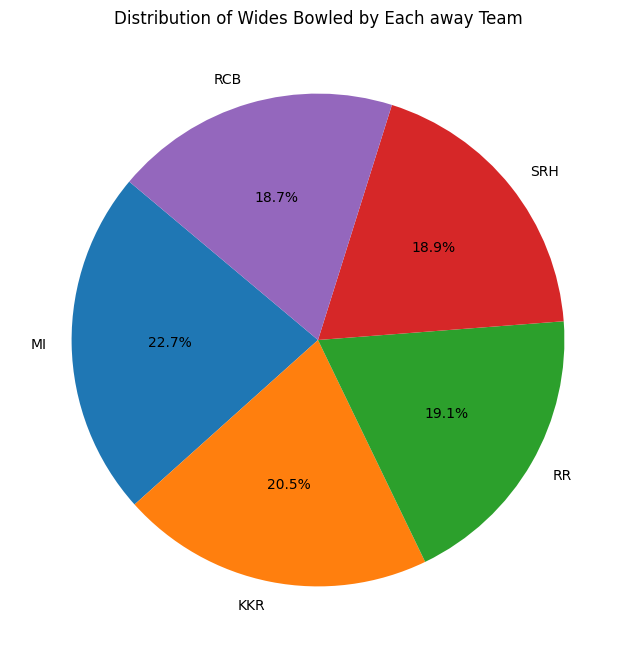

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(away_team_wides.values, labels=away_team_wides.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wides Bowled by Each away Team')
plt.show()

**Distribution of No-Balls Bowled by Each Home Team**


---



In [70]:
home_team_noballs = df.groupby('home_team')['isNoball'].sum().sort_values(ascending=False).head(5)
home_team_noballs

,isNoball
home_team,
CSK,142
SRH,135
DC,118
RCB,117
MI,115


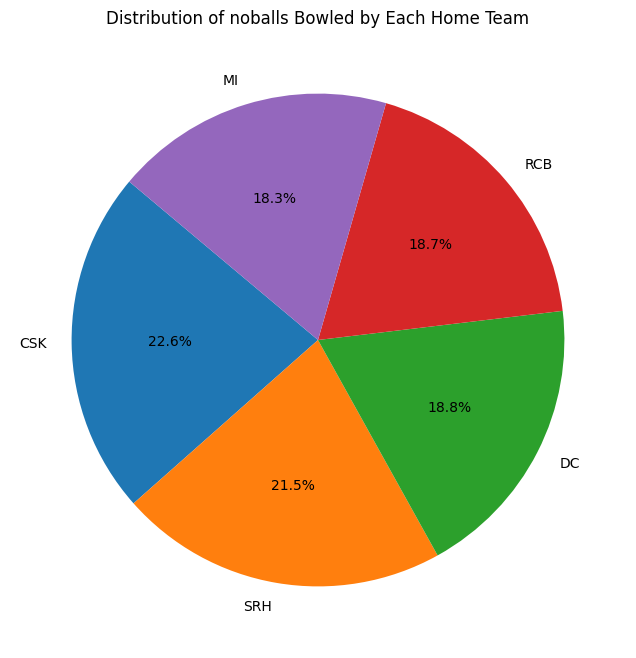

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(home_team_noballs.values, labels=home_team_noballs.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of noballs Bowled by Each Home Team')
plt.show()

**Distribution of No-Balls Bowled by Each Away Team**

---




In [72]:
away_team_noballs = df.groupby('away_team')['isNoball'].sum().sort_values(ascending=False).head(5)
away_team_noballs

,isNoball
away_team,
KKR,135
MI,133
RCB,132
DC,114
RR,113


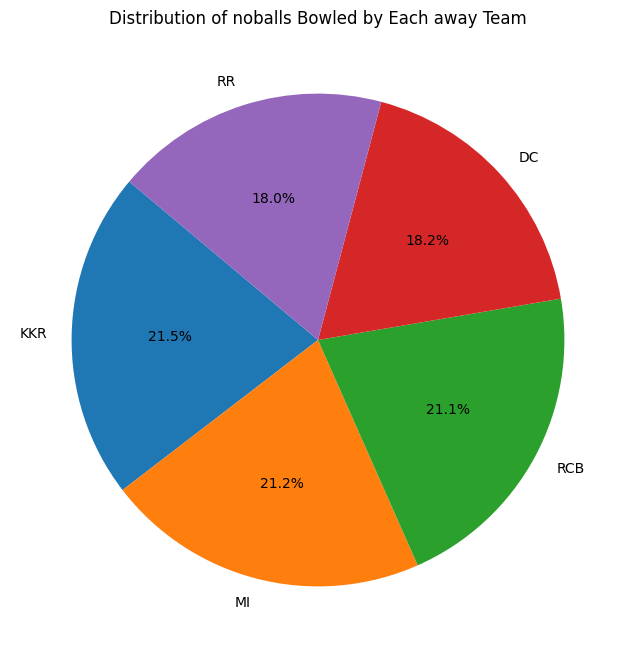

In [73]:
plt.figure(figsize=(8, 8))
plt.pie(away_team_noballs.values, labels=away_team_noballs.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of noballs Bowled by Each away Team')
plt.show()

**Total Extras (Wides and No-Balls) Bowled by Each Team (Combined)**

In [74]:
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt'],
      dtype='object')

In [75]:
home_team_balls = df.groupby('home_team')[['isWide','isNoball']].count()
away_team_balls = df.groupby('away_team')[['isWide','isNoball']].count()

total_team_balls = home_team_wickets.add(away_team_wickets)
total_team_balls = total_team_balls.sort_values(ascending=False).reset_index()
total_team_balls.columns = ['Team', 'total balls']
total_team_balls

,Team,total balls
0,MI,2935
1,SRH,2845
2,DC,2788
3,RCB,2752
4,KKR,2729
5,CSK,2525
6,RR,2369
7,KXIP,2197
8,PWI,531
9,PBKS,499


**Total Boundaries Scored by Each Home Team**

---


In [76]:
home_team_boundaries = df.groupby('home_team')['isBoundary'].sum().sort_values(ascending=False).head(5)
home_team_boundaries.columns=['hometeam','Total Boundaries']
home_team_boundaries

,isBoundary
home_team,
MI,4761
RCB,4753
DC,4693
CSK,4533
SRH,4445


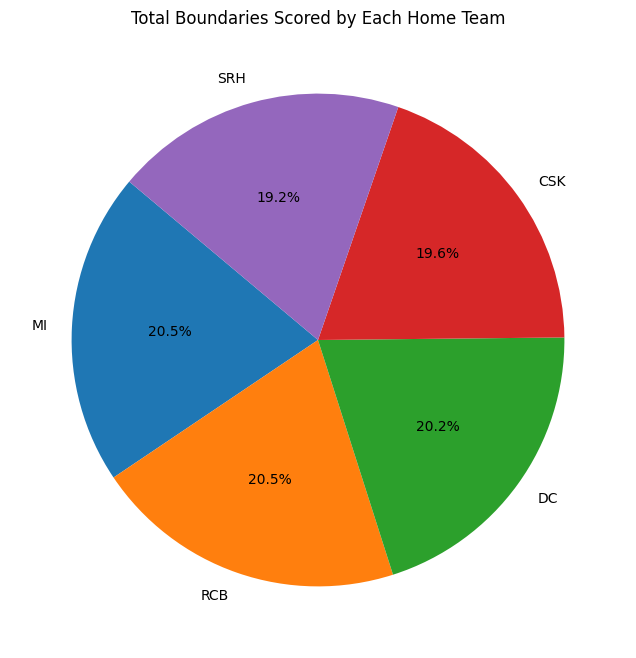

In [77]:
plt.figure(figsize=(8, 8))
plt.pie(home_team_boundaries.values, labels=home_team_boundaries.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Boundaries Scored by Each Home Team')
plt.show()

**Report**

*   The highest boundaries are scored by the MI with a little difference of RCB
*  The least boundaries are scored by SRH



**Number of Matches Played by Each Team at Home**

---



In [78]:
matches_at_home = df.groupby('home_team')['match_id'].nunique().sort_values(ascending=False).head(5)
matches_at_home.columns=['hometeam','totalmatches']
matches_at_home

,match_id
home_team,
CSK,123
DC,123
RCB,122
SRH,122
MI,118


**Number of Matches Played by Each Away Team**

---



In [79]:
matches_at_away = df.groupby('away_team')['match_id'].nunique().sort_values(ascending=False).head(5).reset_index()
matches_at_away.columns=['awayteam','totalmatches']
matches_at_away

,awayteam,totalmatches
0,MI,129
1,KKR,123
2,SRH,119
3,RCB,118
4,DC,115


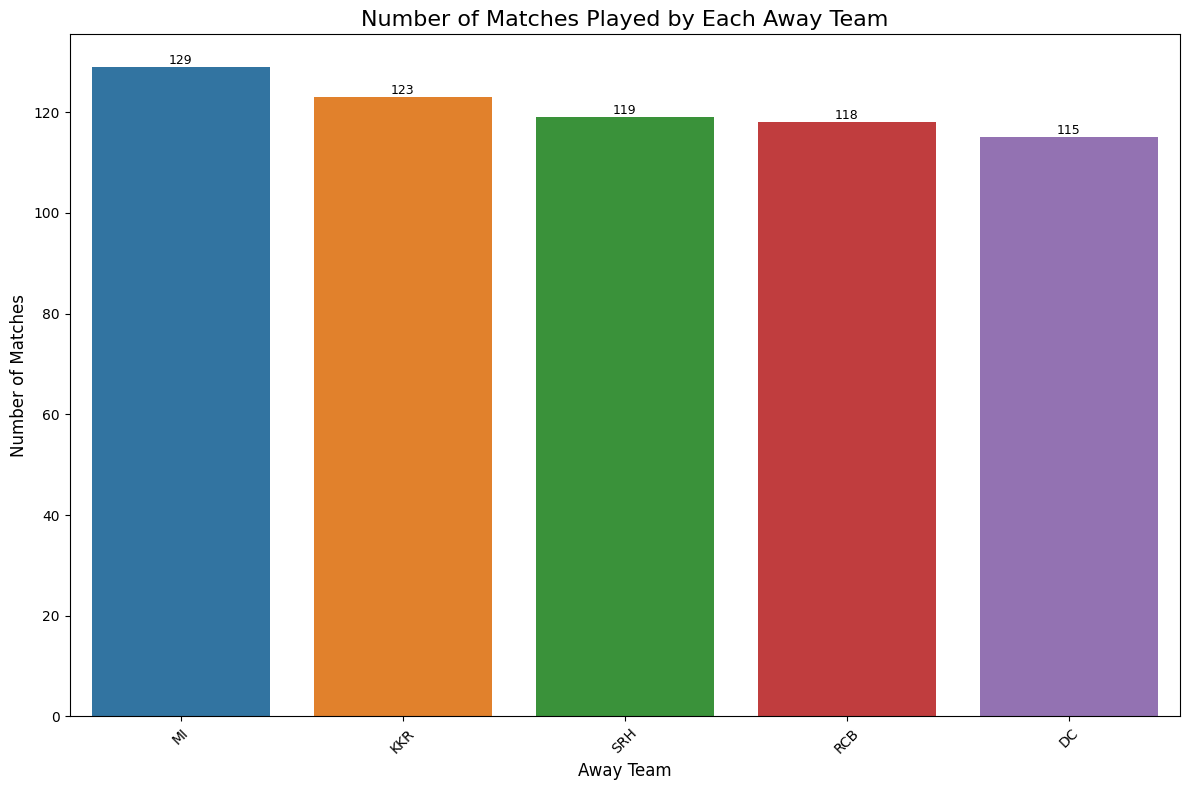

In [80]:
warnings.filterwarnings('ignore')


plt.figure(figsize=(12, 8))

bargraph = sns.barplot(x='awayteam', y='totalmatches', data=matches_at_away, hue='awayteam', dodge=False)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Number of Matches Played by Each Away Team', fontsize=16)
plt.xlabel('Away Team', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Top 10 Batsmen by Total Runs Scored**

---



In [81]:
batsman_by_runs = df.groupby('batsman1_name')['batsman1_runs'].sum().sort_values(ascending=False).head(5)
batsman_by_runs

,batsman1_runs
batsman1_name,
Virat Kohli,133423
David Warner,126924
Shikhar Dhawan,126135
Rohit Sharma,97967
Chris Gayle,94477


**Feature Engineering**

In [82]:
new_df = df[['season', 'match_id', 'home_team', 'away_team', 'current_innings',
                      'innings_id', 'over', 'ball', 'runs', 'wicket_id',
                      'wkt_batsman_name', 'wkt_batsman_runs','bowler1_name']].copy()
new_df.head()

,season,match_id,home_team,away_team,current_innings,innings_id,over,ball,runs,wicket_id,wkt_batsman_name,wkt_batsman_runs,bowler1_name
0,2023.0,1359475,GT,CSK,CSK,1,1,1,0,NaN,NaN,NaN,Mohammed Shami
1,2023.0,1359475,GT,CSK,CSK,1,1,2,1,NaN,NaN,NaN,Mohammed Shami
2,2023.0,1359475,GT,CSK,CSK,1,1,3,0,NaN,NaN,NaN,Mohammed Shami
3,2023.0,1359475,GT,CSK,CSK,1,1,4,1,NaN,NaN,NaN,Mohammed Shami
4,2023.0,1359475,GT,CSK,CSK,1,1,5,0,NaN,NaN,NaN,Mohammed Shami


In [83]:
new_df['strike_rate'] = (new_df['runs'] / new_df['ball']) * 100
new_df['strike_rate'] = new_df['strike_rate'].fillna(0)
new_df['strike_rate']

,strike_rate
0,0.000000
1,50.000000
2,0.000000
3,25.000000
4,0.000000
...,...
242545,0.000000
242546,33.333333
242547,25.000000
242548,50.000000


In [84]:
new_df['over_runs'] = new_df.groupby(['match_id', 'current_innings', 'over'])['runs'].transform('sum')
new_df['over_run_rate'] = new_df['over_runs'] / (new_df['over'] + 1.0)
new_df['over_run_rate']

,over_run_rate
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
242545,0.333333
242546,0.333333
242547,0.333333
242548,0.333333


In [85]:
new_df['cumulative_runs'] = new_df.groupby(['match_id', 'current_innings'])['runs'].cumsum()
new_df['cumulative_runs']

,cumulative_runs
0,0
1,1
2,1
3,2
4,2
...,...
242545,157
242546,158
242547,159
242548,161


In [86]:
new_df['run_rate'] = new_df['cumulative_runs'] / (new_df['over'] + 0.1)
new_df['run_rate']

,run_rate
0,0.000000
1,0.909091
2,0.909091
3,1.818182
4,1.818182
...,...
242545,7.810945
242546,7.860697
242547,7.910448
242548,8.009950


In [87]:
# Assuming 'wkt_batsman_name' indicates a wicket
new_df['wickets_taken'] = new_df['wkt_batsman_name'].notnull().astype(int)

# Calculate cumulative wickets for each bowler in the given match and innings
new_df['bowler_wickets'] = new_df.groupby(['match_id', 'current_innings', 'bowler1_name'])['wickets_taken'].cumsum()
result_df = new_df[['match_id', 'current_innings', 'bowler1_name', 'bowler_wickets']]
result_df

,match_id,current_innings,bowler1_name,bowler_wickets
0,1359475,CSK,Mohammed Shami,0
1,1359475,CSK,Mohammed Shami,0
2,1359475,CSK,Mohammed Shami,0
3,1359475,CSK,Mohammed Shami,0
4,1359475,CSK,Mohammed Shami,0
...,...,...,...,...
242545,336040,RR,Lakshmipathy Balaji,0
242546,336040,RR,Lakshmipathy Balaji,0
242547,336040,RR,Lakshmipathy Balaji,0
242548,336040,RR,Lakshmipathy Balaji,0


In [88]:
new_df['wickets_lost'] = new_df.groupby(['match_id', 'current_innings'])['wkt_batsman_runs']\
                                                 .transform(lambda x: (x >= 0).cumsum())
new_df['wickets_lost']

,wickets_lost
0,0
1,0
2,0
3,0
4,0
...,...
242545,7
242546,7
242547,7
242548,7


In [89]:
new_df['cumulative_balls'] = new_df.groupby(['match_id', 'current_innings']).cumcount() + 1
new_df['cumulative_strike_rate'] = (new_df['cumulative_runs'] / new_df['cumulative_balls']) * 100
new_df['cumulative_strike_rate']

,cumulative_strike_rate
0,0.000000
1,50.000000
2,33.333333
3,50.000000
4,40.000000
...,...
242545,129.752066
242546,129.508197
242547,129.268293
242548,129.838710


In [90]:
new_df.fillna(0, inplace=True)

**Model Baseline**

In [91]:
team_mapping = {'GT': 0, 'PBKS': 1, 'LSG': 2, 'SRH': 3,'RCB': 4, 'CSK': 5, 'DC': 6, 'RR': 7,
                'KKR': 8, 'MI': 9, 'KXIP': 10, 'RPS': 11,'GL': 12, 'PWI': 13, 'KOCHI': 14}
new_df['home_team_encoded'] = new_df['home_team'].map(team_mapping)
new_df['away_team_encoded'] = new_df['away_team'].map(team_mapping)
new_df['current_innings'] = new_df['current_innings'].map(team_mapping)
new_df.fillna(0, inplace=True)
df_result=new_df[['home_team_encoded','away_team_encoded','current_innings']]
df_result

,home_team_encoded,away_team_encoded,current_innings
0,0.0,5.0,5.0
1,0.0,5.0,5.0
2,0.0,5.0,5.0
3,0.0,5.0,5.0
4,0.0,5.0,5.0
...,...,...,...
242545,5.0,7.0,7.0
242546,5.0,7.0,7.0
242547,5.0,7.0,7.0
242548,5.0,7.0,7.0


In [92]:
X = new_df[['home_team_encoded','away_team_encoded','current_innings','over', 'ball', 'run_rate','wickets_lost','wickets_taken','cumulative_strike_rate']]
y = new_df['cumulative_runs']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train

,home_team_encoded,away_team_encoded,current_innings,over,ball,run_rate,wickets_lost,wickets_taken,cumulative_strike_rate
199033,13.0,8.0,13.0,12,4,5.537190,3,0,93.055556
237647,6.0,3.0,6.0,17,1,8.596491,2,0,144.117647
10462,0.0,6.0,6.0,1,5,4.545455,1,0,100.000000
39476,7.0,4.0,7.0,8,4,8.518519,0,0,150.000000
137929,3.0,5.0,3.0,9,2,6.153846,2,0,112.000000
...,...,...,...,...,...,...,...,...,...
119880,8.0,3.0,3.0,10,6,7.029703,3,0,116.393443
103695,3.0,9.0,3.0,12,4,8.016529,1,0,138.571429
131933,10.0,4.0,4.0,6,1,8.196721,2,0,151.515152
146868,8.0,3.0,3.0,18,6,7.182320,5,0,117.117117


In [95]:
X_test

,home_team_encoded,away_team_encoded,current_innings,over,ball,run_rate,wickets_lost,wickets_taken,cumulative_strike_rate
122567,7.0,9.0,9.0,10,5,4.455446,4,1,76.271186
147657,9.0,5.0,9.0,5,2,6.078431,0,0,119.230769
27100,0.0,3.0,0.0,1,1,0.000000,0,0,0.000000
42494,5.0,9.0,5.0,2,5,0.952381,2,0,18.181818
154360,3.0,10.0,3.0,19,1,5.863874,5,0,102.752294
...,...,...,...,...,...,...,...,...,...
19878,0.0,6.0,0.0,17,5,8.362573,3,0,138.834951
217200,5.0,6.0,5.0,14,3,9.503546,3,0,157.647059
188030,8.0,7.0,7.0,3,1,4.516129,0,0,107.692308
220381,8.0,9.0,8.0,15,1,6.092715,2,0,102.222222


In [96]:
y_train

,cumulative_runs
199033,67
237647,147
10462,5
39476,69
137929,56
...,...
119880,71
103695,97
131933,50
146868,130


In [97]:
y_test

,cumulative_runs
122567,45
147657,31
27100,0
42494,2
154360,112
...,...
19878,143
217200,134
188030,14
220381,92


**Train the Random Forest model**

In [98]:
rf_model=RandomForestRegressor()

In [99]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
y_rf_simple_pred = rf_model.predict(X_test)

In [101]:
rf_simple_mse=mean_squared_error(y_test,y_rf_simple_pred)
rf_r2=r2_score(y_test,y_rf_simple_pred)

In [102]:
print('MSE score: ',rf_simple_mse)

MSE score:  0.081191504844362


In [103]:
print('R2 score: ',rf_r2)

R2 score:  0.999967467754577


**Linear Regression**

In [104]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [105]:
pred = lr_model.predict(X_test)
lr_mse=mean_squared_error(y_test,pred)

In [106]:
print('MSE score: ',lr_mse)
lr_r2=r2_score(y_test,pred)
print('R2 score: ',lr_r2)

MSE score:  234.00465804614657
R2 score:  0.906237764895929


**Polynomial Regression**

In [107]:
poly = PolynomialFeatures(degree=2)
X_polya = poly.fit_transform(X_train)
X_polyb=poly.fit_transform(X_test)

In [108]:
poly_model = LinearRegression()
poly_model.fit(X_polya, y_train)
pred = poly_model.predict(X_polyb)

In [109]:
pr_mse=mean_squared_error(y_test,pred)
print('MSE score: ',pr_mse)

pr_r2=r2_score(y_test,pred)
print('R2 score: ',pr_r2)

MSE score:  4.608998684827578e-24
R2 score:  1.0


**XGB Regressor**

In [110]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [111]:
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [112]:
print("XGBoost Regressor:")
print("MSE score: ",mse_xgb)
print("R2 score: ",r2_xgb)

XGBoost Regressor:
MSE score:  0.3585136782550974
R2 score:  0.9998563528060913


**Gradient BoostRegression**

In [113]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [114]:
y_pred_gb = gb_model.predict(X_test)

In [115]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [116]:
print("Gradient Boosting Regressor:")
print("MSE score: ",mse_gb)
print("R2 score: ",r2_gb)

Gradient Boosting Regressor:
MSE score:  3.084040290028468
R2 score:  0.9987642702792393


**Decision Tree Regression**

In [117]:
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)
pred = tree_model.predict(X_test)

In [118]:
tree_mse=mean_squared_error(y_test,pred)
print('MSE score: ',tree_mse)
tree_r2=r2_score(y_test,pred)
print('R2 score: ',tree_r2)

MSE score:  327.7749015281932
R2 score:  0.8686654033517592


In [119]:
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Polynomial Regression','Gradient Boosting','XGBoost Regressor'],
    'MSE': [rf_simple_mse, lr_mse, pr_mse,mse_gb,mse_xgb],
    'R² Score': [rf_r2, lr_r2, pr_r2,r2_gb,r2_xgb]
})
print(model_comparison)

                   Model           MSE  R² Score
0          Random Forest  8.119150e-02  0.999967
1      Linear Regression  2.340047e+02  0.906238
2  Polynomial Regression  4.608999e-24  1.000000
3      Gradient Boosting  3.084040e+00  0.998764
4      XGBoost Regressor  3.585137e-01  0.999856


**Making a Prediction**

In [120]:
new_data = pd.DataFrame({
    'home_team_encoded': [13],
    'away_team_encoded': [8],
    'current_innings':[13],
    'over': [12],
    'ball': [4],
    'run_rate': [5.537],
    'wickets_lost': [3],
    'wickets_taken':[0],
    'cumulative_strike_rate':[93]
})

In [121]:
predict_runs=rf_model.predict(new_data)       #Prediction by random forest
print(f"Predicted Cumulative Runs: {predict_runs[0]}")

Predicted Cumulative Runs: 67.0


In [122]:
predicted_runs_lr = lr_model.predict(new_data)                   #prediction by linear regression
print(f"Predicted Cumulative Runs: {predicted_runs_lr[0]}")

Predicted Cumulative Runs: 79.86925054280805


In [123]:
predicted_runs_rdg = gb_model.predict(new_data)                 #prediction by gradient boost regression
print(f"Predicted Cumulative Runs: {predicted_runs_rdg[0]}")

Predicted Cumulative Runs: 68.06745705428104


In [124]:
predicted_runs_xgb = xgb_model.predict(new_data)                  #prediction by xgboost
print(f"Predicted Cumulative Runs: {predicted_runs_xgb[0]}")

Predicted Cumulative Runs: 65.25233459472656


**Hyper parametertuning**

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [126]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    random_state=42
)

In [127]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduce the range or number of values
    'max_depth': [10, 20],           # Focus on reasonable ranges
    'min_samples_split': [2, 5]      # Fewer values
}

In [128]:
grid_search=GridSearchCV(estimator=rf_model,
                         param_grid=param_grid,
                        scoring='r2',
                        cv=3,
                        verbose=3,
                        refit=True,
                        return_train_score=True)

In [129]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=1.000) total time=  14.8s
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=1.000) total time=  14.3s
[CV 3/3] END max_depth=10, min_samples_split=2, n_estimators=50;, score=(train=1.000, test=1.000) total time=  15.5s
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=1.000) total time=  29.0s
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=1.000) total time=  28.6s
[CV 3/3] END max_depth=10, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=1.000) total time=  28.6s
[CV 1/3] END max_depth=10, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=1.000) total time=  42.9s
[CV 2/3] END max_depth=10, min_samples_split=2, n_estimators=150;, score=(train=1.000, test=1.000) total time=  43.2

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='r2', verbose=3)

In [130]:
best_parameter=grid_search.best_params_
best_score=grid_search.best_score_
best_model=grid_search.best_estimator_

In [131]:
print("Best Parameters:", best_parameter)
print("Best R² Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.999949840417291


**Time series Forcasting**

In [136]:
Suryakumar_Yadav_data = df[df['batsman1_name'] == 'Suryakumar Yadav']

In [137]:
Suryakumar_Yadav_season_runs = Suryakumar_Yadav_data.groupby('season')['runs'].sum()

In [138]:
if isinstance(Suryakumar_Yadav_season_runs, pd.Series):
    Suryakumar_Yadav_season_runs = Suryakumar_Yadav_season_runs.reset_index()

In [139]:
Suryakumar_Yadav_season_runs['season'] = pd.to_datetime(Suryakumar_Yadav_season_runs['season'], format='%Y')
print(Suryakumar_Yadav_season_runs)

       season  runs
0  2012-01-01     0
1  2014-01-01   170
2  2015-01-01   161
3  2016-01-01   190
4  2017-01-01   108
5  2018-01-01   524
6  2019-01-01   437
7  2020-01-01   492
8  2021-01-01   327
9  2022-01-01   313
10 2023-01-01   575


**Visualization**

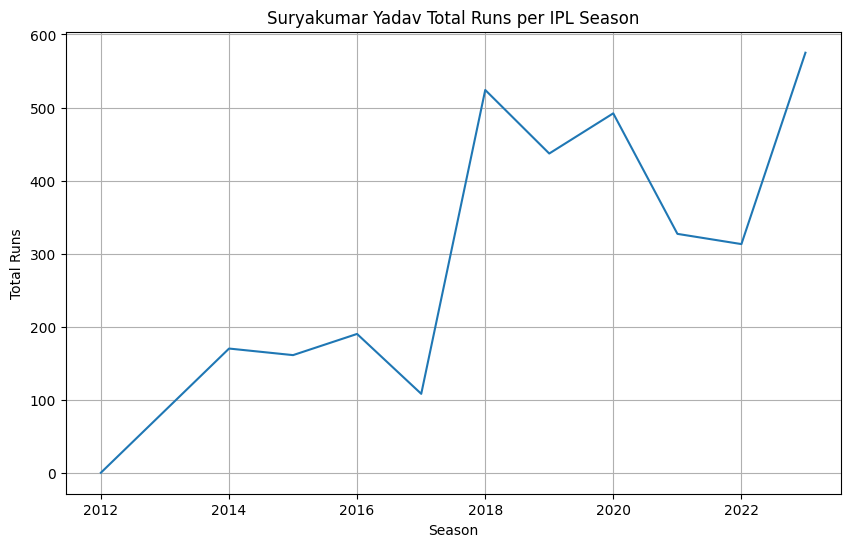

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(Suryakumar_Yadav_season_runs['season'], Suryakumar_Yadav_season_runs['runs'])
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Suryakumar Yadav Total Runs per IPL Season')
plt.grid(True)
plt.show()

**Histogram and Density Plot**

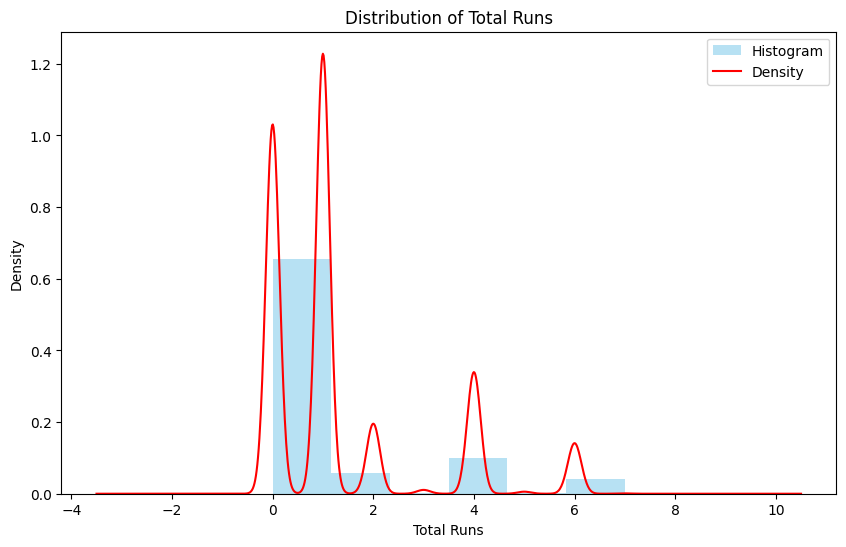

In [141]:
plt.figure(figsize=(10, 6))
df['runs'].plot(kind='hist', bins=6, density=True, alpha=0.6, color='skyblue', label='Histogram')
df['runs'].plot(kind='kde', color='red', label='Density')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.legend()
plt.show()

**Outlier Detection**

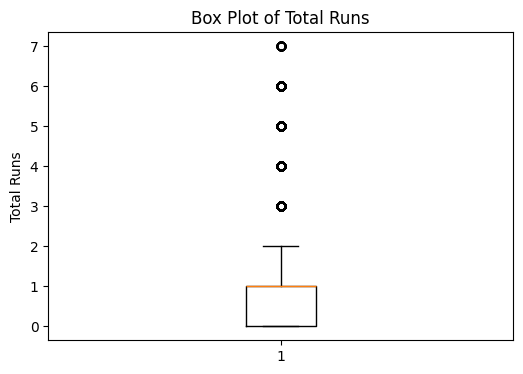

In [142]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['runs'])
plt.title('Box Plot of Total Runs')
plt.ylabel('Total Runs')
plt.show()

**Stationarity Check**

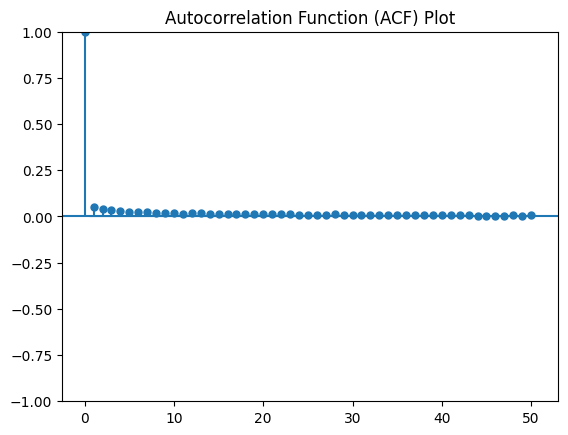

In [143]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

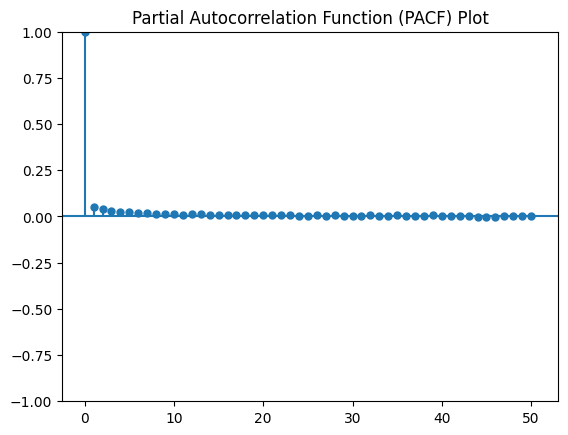

In [144]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

**Augmented Dickey-Fuller (ADF) Test**

In [145]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -64.685367
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


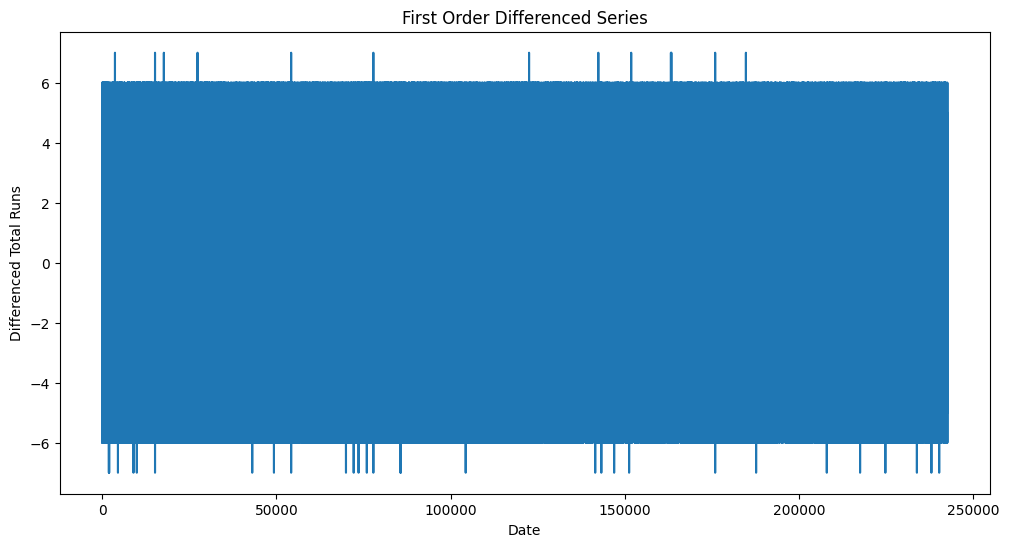

In [146]:
df['Diff_1'] = df['runs'] - df['runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Diff_1'])
plt.title('First Order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Total Runs')
plt.show()

In [147]:
adf_result_diff = adfuller(df['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -89.229717
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Log Transformation**

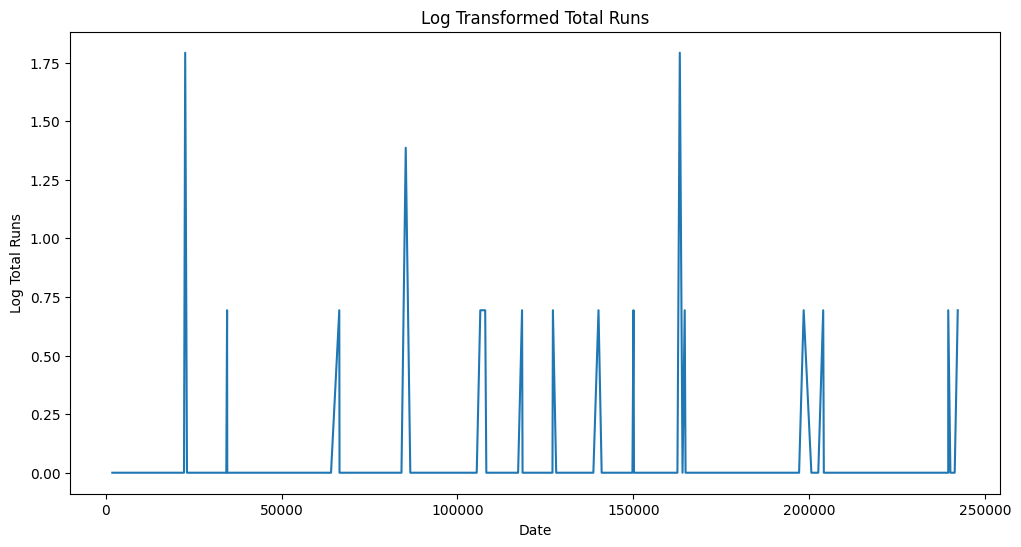

In [148]:
df['Log_Total_Runs'] = np.log(df['runs']).replace([np.inf, -np.inf], np.nan)
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)
df['Log_Diff_1'].dropna(inplace=True)
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Total_Runs'])
plt.title('Log Transformed Total Runs')
plt.xlabel('Date')
plt.ylabel('Log Total Runs')
plt.show()

In [149]:
adf_result_log_diff = adfuller(df['Log_Diff_1'])
print('ADF Statistic: %f' % adf_result_log_diff[0])
print('p-value: %f' % adf_result_log_diff[1])
print('Critical Values:')
for key, value in adf_result_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.763328
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


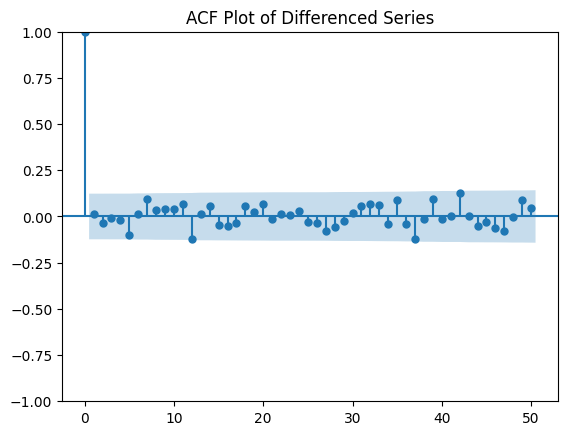

In [150]:
plot_acf(df['Diff_1'].dropna(), lags=50)
plt.title('ACF Plot of Differenced Series')
plt.show()

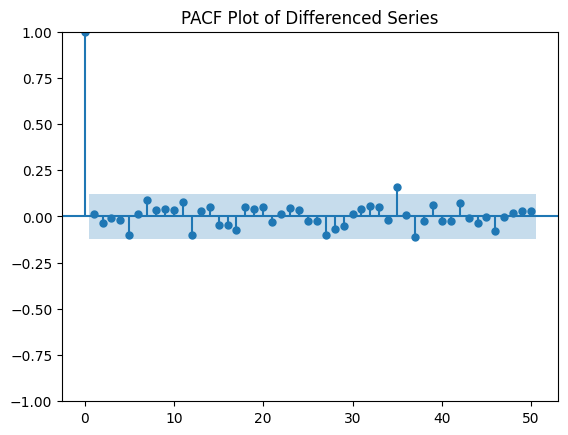

In [151]:
plot_pacf(df['Diff_1'].dropna(), lags=50)
plt.title('PACF Plot of Differenced Series')
plt.show()

**Forcast using SARIMAX**

In [152]:
Suryakumar_Yadav_season_runs.set_index('season', inplace=True)

In [153]:
num_seasons = len(Suryakumar_Yadav_season_runs)
num_seasons

11

In [154]:
model = SARIMAX(Suryakumar_Yadav_season_runs,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4))

In [155]:
result = model.fit()
result

In [156]:
forecast = result.get_forecast(steps=5)
forecast_runs = forecast.predicted_mean.astype(int)
print(f"Predicted runs for next season: {forecast_runs}")

Predicted runs for next season: 11    557
12    446
13    737
14    701
15    741
Name: predicted_mean, dtype: int64


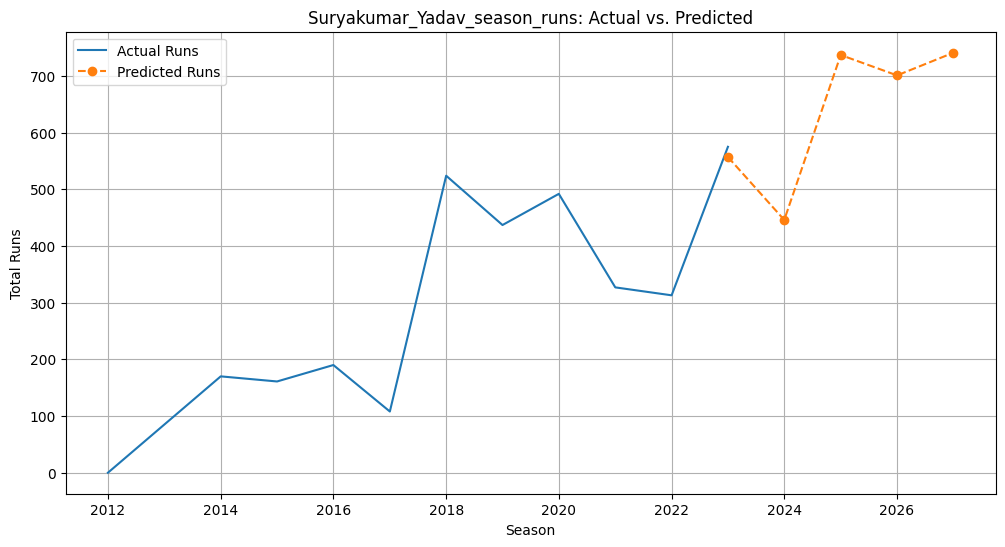

In [158]:
forecast_df = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=5, freq='YS'), 'predicted_runs': forecast_runs.values})

merged_data = pd.concat([Suryakumar_Yadav_season_runs.reset_index(), forecast_df], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

plt.figure(figsize=(12, 6))
plt.plot(Suryakumar_Yadav_season_runs.index, Suryakumar_Yadav_season_runs['runs'], label='Actual Runs')
plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Suryakumar_Yadav_season_runs: Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()